# Enhanced Report Display - Individual Models vs Ensemble

This notebook displays comprehensive results comparing individual feature-based models with ensemble performance.

In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import glob
from scipy.stats import ttest_rel
from modules.PostgresDBHandler import PostgresDBHandler

# Feature types used in your project
FEATURE_TYPES = [
    'mel_spectrogram', 'mfcc', 'chromagram', 'spectral_contrast',
    'tonnetz', 'constant_q', 'cqt', 'stft', 'harmonic_percussive', 'onset_strength'
]

dbParams = {
    "dbname": "mydatabase",
    "user": "myuser",
    "password": "mypassword",
    "host": "postgres_server",
    "port": "5432",
}

In [2]:
db = PostgresDBHandler(**dbParams)
db.connect()
instrument_df = db.get_mappings_instruments()
db.close()

class_names = [name for _, name in sorted(zip(instrument_df['instrumentid'], instrument_df['name']))]
print("Class names:", class_names)

Class names: ['clarinet', 'flute', 'cello', 'violin', 'bass', 'sax', 'trumpet', 'oboe', 'piccolo']


In [3]:
# Find and load the latest ensemble results
ensemble_results_files = sorted(glob.glob("ensemble_results/ensemble_results_*.json"), reverse=True)
if not ensemble_results_files:
    raise FileNotFoundError("No ensemble results file found in ensemble_results/ directory.")
ENSEMBLE_RESULTS_PATH = ensemble_results_files[0]

with open(ENSEMBLE_RESULTS_PATH, "r") as file:
    ensemble_results = json.load(file)

print(f"Loaded ensemble results from: {ENSEMBLE_RESULTS_PATH}")

Loaded ensemble results from: ensemble_results/ensemble_results_2025_07_08.json


In [4]:
# Load individual model results for all feature types
individual_results = {}
for feature_type in FEATURE_TYPES:
    results_path = f"models/{feature_type}/results.json"
    if os.path.exists(results_path):
        with open(results_path, "r") as f:
            individual_results[feature_type] = json.load(f)
    else:
        print(f"Results not found for {feature_type}")

In [5]:
# Display ensemble accuracy statistics
accs = ensemble_results['accuracy_list']
print("Ensemble Accuracies (per fold):", accs)
print(f"Mean Ensemble Accuracy: {np.mean(accs):.4f}")
print(f"Std Ensemble Accuracy: {np.std(accs):.4f}")
print(f"Min Ensemble Accuracy: {np.min(accs):.4f}")
print(f"Max Ensemble Accuracy: {np.max(accs):.4f}")

Ensemble Accuracies (per fold): [0.8611111111111112, 0.8449074074074074, 0.8449074074074074, 0.8634259259259259, 0.8375870069605569]
Mean Ensemble Accuracy: 0.8504
Std Ensemble Accuracy: 0.0101
Min Ensemble Accuracy: 0.8376
Max Ensemble Accuracy: 0.8634


In [6]:
# Display ensemble classification reports for each fold
for i, report in enumerate(ensemble_results['classification_reports']):
    df = pd.DataFrame(report).transpose()
    df.index = [class_names[int(idx)] if idx.isdigit() and int(idx) < len(class_names) else idx for idx in df.index]
    display(df)

precision    recall  f1-score     support
clarinet       0.844444  0.730769  0.783505   52.000000
flute          0.857143  0.960000  0.905660   50.000000
cello          0.979167  0.886792  0.930693   53.000000
violin         0.750000  0.957447  0.841121   47.000000
bass           0.909091  0.952381  0.930233   21.000000
sax            0.966667  0.674419  0.794521   43.000000
trumpet        0.787879  0.928571  0.852459   56.000000
oboe           0.823529  0.840000  0.831683   50.000000
piccolo        0.944444  0.850000  0.894737   60.000000
accuracy       0.861111  0.861111  0.861111    0.861111
macro avg      0.873596  0.864487  0.862735  432.000000
weighted avg   0.871611  0.861111  0.860162  432.000000

precision    recall  f1-score     support
clarinet       0.805556  0.591837  0.682353   49.000000
flute          0.872727  0.827586  0.849558   58.000000
cello          0.816327  0.869565  0.842105   46.000000
violin         0.826923  0.934783  0.877551   46.000000
bass           1.000000  0.810811  0.895522   37.000000
sax            0.920000  0.836364  0.876190   55.000000
trumpet        0.724638  0.892857  0.800000   56.000000
oboe           0.906977  0.906977  0.906977   43.000000
piccolo        0.833333  0.952381  0.888889   42.000000
accuracy       0.844907  0.844907  0.844907    0.844907
macro avg      0.856276  0.847018  0.846572  432.000000
weighted avg   0.851527  0.844907  0.843222  432.000000

precision    recall  f1-score     support
clarinet       1.000000  0.530612  0.693333   49.000000
flute          0.812500  0.886364  0.847826   44.000000
cello          0.947368  0.947368  0.947368   57.000000
violin         0.846154  0.982143  0.909091   56.000000
bass           1.000000  0.923077  0.960000   26.000000
sax            0.903846  0.810345  0.854545   58.000000
trumpet        0.677419  0.840000  0.750000   50.000000
oboe           0.844444  0.791667  0.817204   48.000000
piccolo        0.754717  0.909091  0.824742   44.000000
accuracy       0.844907  0.844907  0.844907    0.844907
macro avg      0.865161  0.846741  0.844901  432.000000
weighted avg   0.861504  0.844907  0.841956  432.000000

precision    recall  f1-score     support
clarinet       0.607843  0.775000  0.681319   40.000000
flute          0.905660  0.905660  0.905660   53.000000
cello          0.866667  0.906977  0.886364   43.000000
violin         1.000000  0.960000  0.979592   50.000000
bass           1.000000  0.864865  0.927536   37.000000
sax            0.882353  0.849057  0.865385   53.000000
trumpet        0.780000  0.812500  0.795918   48.000000
oboe           0.931818  0.773585  0.845361   53.000000
piccolo        0.862069  0.909091  0.884956   55.000000
accuracy       0.863426  0.863426  0.863426    0.863426
macro avg      0.870712  0.861859  0.863566  432.000000
weighted avg   0.874040  0.863426  0.866229  432.000000

precision    recall  f1-score     support
clarinet       0.823529  0.466667  0.595745   60.000000
flute          0.703125  1.000000  0.825688   45.000000
cello          0.976744  0.823529  0.893617   51.000000
violin         0.844828  0.960784  0.899083   51.000000
bass           0.950000  1.000000  0.974359   38.000000
sax            0.967742  0.731707  0.833333   41.000000
trumpet        0.729167  0.875000  0.795455   40.000000
oboe           0.886792  0.839286  0.862385   56.000000
piccolo        0.783333  0.959184  0.862385   49.000000
accuracy       0.837587  0.837587  0.837587    0.837587
macro avg      0.851696  0.850684  0.838006  431.000000
weighted avg   0.851370  0.837587  0.830370  431.000000

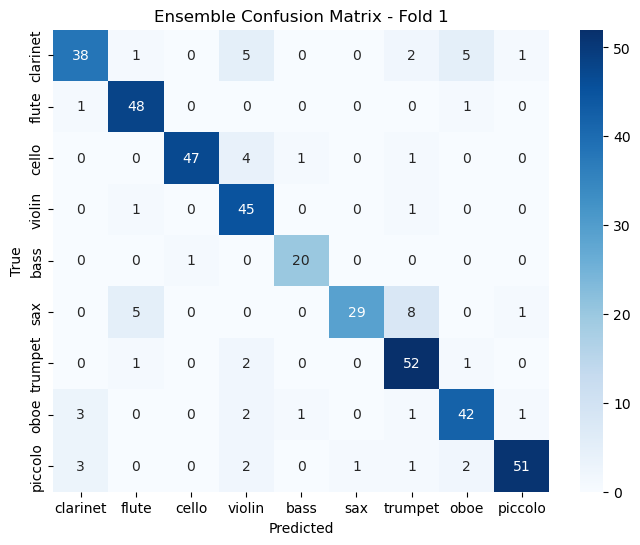

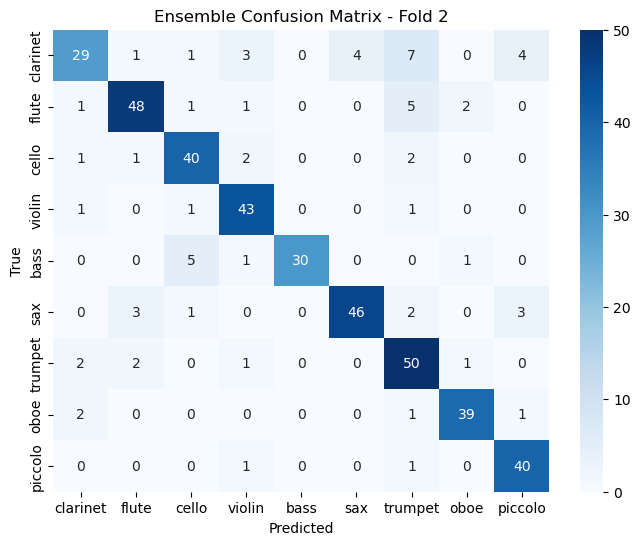

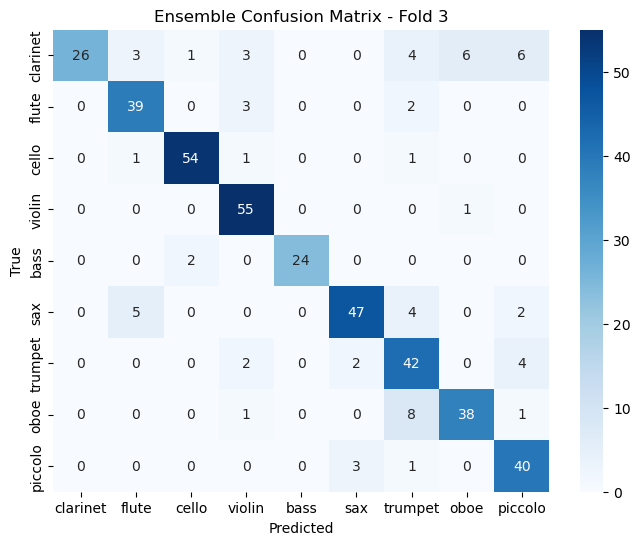

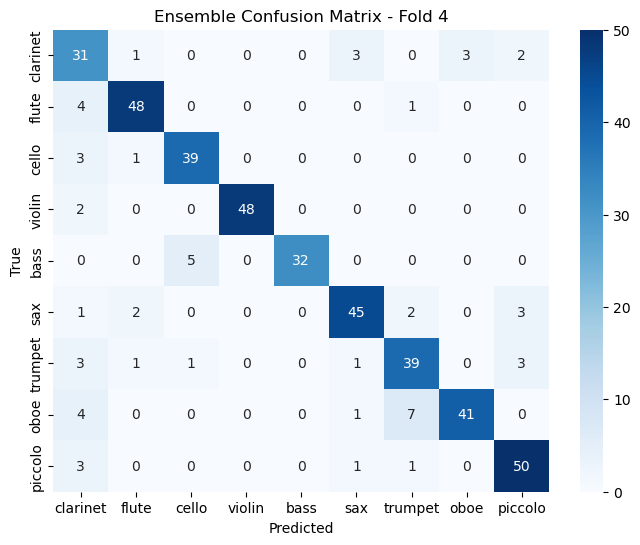

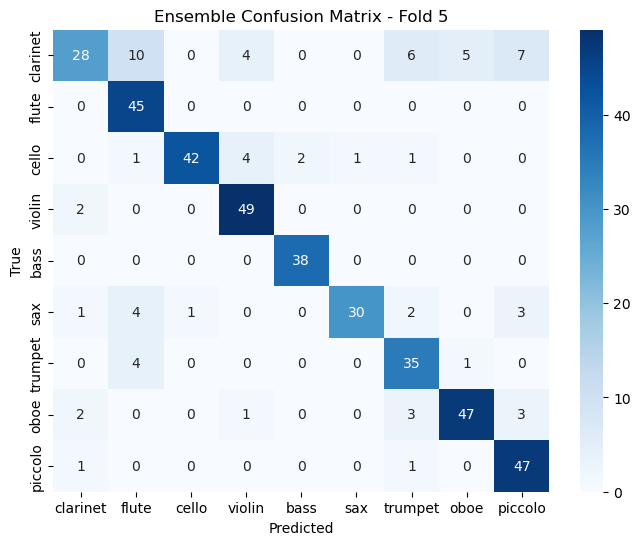

In [7]:
# Display ensemble confusion matrices for each fold
for i, conf_matrix in enumerate(ensemble_results['confusion_matrices']):
    plt.figure(figsize=(8, 6))
    sns.heatmap(np.array(conf_matrix), annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Ensemble Confusion Matrix - Fold {i+1}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

In [8]:
# Create a summary DataFrame for individual models
performance_data = []
for feature_type, results in individual_results.items():
    accuracies = results['accuracy_list']
    losses = results['loss_list']
    performance_data.append({
        'Feature Type': feature_type.replace('_', ' ').title(),
        'Mean Accuracy': np.mean(accuracies),
        'Std Accuracy': np.std(accuracies),
        'Min Accuracy': np.min(accuracies),
        'Max Accuracy': np.max(accuracies),
        'Mean Loss': np.mean(losses),
        'Std Loss': np.std(losses)
    })

performance_df = pd.DataFrame(performance_data)
performance_df = performance_df.sort_values('Mean Accuracy', ascending=False)
display(performance_df.round(4))

Feature Type  Mean Accuracy  Std Accuracy  Min Accuracy  \
0      Mel Spectrogram         0.8110        0.0202        0.7889   
6                  Cqt         0.7651        0.0352        0.7193   
5           Constant Q         0.6809        0.0945        0.5278   
1                 Mfcc         0.6726        0.0446        0.6204   
8  Harmonic Percussive         0.6156        0.0352        0.5718   
7                 Stft         0.5095        0.0685        0.4144   
3    Spectral Contrast         0.4025        0.0371        0.3588   
4              Tonnetz         0.3335        0.0249        0.3009   
2           Chromagram         0.3196        0.0487        0.2708   
9       Onset Strength         0.1955        0.0310        0.1620   

   Max Accuracy  Mean Loss  Std Loss  
0        0.8426     4.3024    0.7055  
6        0.8032     5.8861    1.3808  
5        0.7731     2.9088    0.5829  
1        0.7292     0.9837    0.1342  
8        0.6705    62.6940   22.5097  
7        0.6102    18.3824    2.1795  
3        0.4514     1.6783    0.1067  
4        0.3735     1.8644    0.1107  
2        0.4028     1.9054    0.1014  
9        0.2361     2.1099    0.0560


Mel Spectrogram Model
Accuracies: [0.7962962985038757, 0.8425925970077515, 0.8009259104728699, 0.8263888955116272, 0.7888631224632263]
Mean: 0.8110, Std: 0.0202, Min: 0.7889, Max: 0.8426


precision    recall  f1-score     support
clarinet       0.584615  0.730769  0.649573   52.000000
flute          0.796610  0.940000  0.862385   50.000000
cello          0.895833  0.811321  0.851485   53.000000
violin         0.840909  0.787234  0.813187   47.000000
bass           0.833333  0.952381  0.888889   21.000000
sax            0.928571  0.604651  0.732394   43.000000
trumpet        0.737705  0.803571  0.769231   56.000000
oboe           0.750000  0.840000  0.792453   50.000000
piccolo        0.978723  0.766667  0.859813   60.000000
accuracy       0.796296  0.796296  0.796296    0.796296
macro avg      0.816256  0.804066  0.802157  432.000000
weighted avg   0.815268  0.796296  0.797902  432.000000

precision    recall  f1-score     support
clarinet       0.723404  0.693878  0.708333   49.000000
flute          0.921569  0.810345  0.862385   58.000000
cello          0.803922  0.891304  0.845361   46.000000
violin         0.826923  0.934783  0.877551   46.000000
bass           0.933333  0.756757  0.835821   37.000000
sax            0.934783  0.781818  0.851485   55.000000
trumpet        0.796875  0.910714  0.850000   56.000000
oboe           0.909091  0.930233  0.919540   43.000000
piccolo        0.787234  0.880952  0.831461   42.000000
accuracy       0.842593  0.842593  0.842593    0.842593
macro avg      0.848570  0.843420  0.842437  432.000000
weighted avg   0.848710  0.842593  0.842128  432.000000

precision    recall  f1-score     support
clarinet       0.896552  0.530612  0.666667   49.000000
flute          0.765957  0.818182  0.791209   44.000000
cello          0.787879  0.912281  0.845528   57.000000
violin         0.844828  0.875000  0.859649   56.000000
bass           0.920000  0.884615  0.901961   26.000000
sax            0.901961  0.793103  0.844037   58.000000
trumpet        0.677966  0.800000  0.733945   50.000000
oboe           0.863636  0.791667  0.826087   48.000000
piccolo        0.679245  0.818182  0.742268   44.000000
accuracy       0.800926  0.800926  0.800926    0.800926
macro avg      0.815336  0.802627  0.801261  432.000000
weighted avg   0.813255  0.800926  0.799143  432.000000

precision    recall  f1-score     support
clarinet       0.627907  0.675000  0.650602   40.000000
flute          0.897959  0.830189  0.862745   53.000000
cello          0.722222  0.906977  0.804124   43.000000
violin         0.938776  0.920000  0.929293   50.000000
bass           0.966667  0.783784  0.865672   37.000000
sax            0.833333  0.754717  0.792079   53.000000
trumpet        0.750000  0.875000  0.807692   48.000000
oboe           0.849057  0.849057  0.849057   53.000000
piccolo        0.900000  0.818182  0.857143   55.000000
accuracy       0.826389  0.826389  0.826389    0.826389
macro avg      0.831769  0.823656  0.824267  432.000000
weighted avg   0.835962  0.826389  0.828041  432.000000

precision    recall  f1-score     support
clarinet       0.641026  0.416667  0.505051   60.000000
flute          0.617647  0.933333  0.743363   45.000000
cello          0.916667  0.862745  0.888889   51.000000
violin         0.807018  0.901961  0.851852   51.000000
bass           0.925000  0.973684  0.948718   38.000000
sax            0.939394  0.756098  0.837838   41.000000
trumpet        0.723404  0.850000  0.781609   40.000000
oboe           0.814815  0.785714  0.800000   56.000000
piccolo        0.822222  0.755102  0.787234   49.000000
accuracy       0.788863  0.788863  0.788863    0.788863
macro avg      0.800799  0.803923  0.793839  431.000000
weighted avg   0.795089  0.788863  0.783233  431.000000

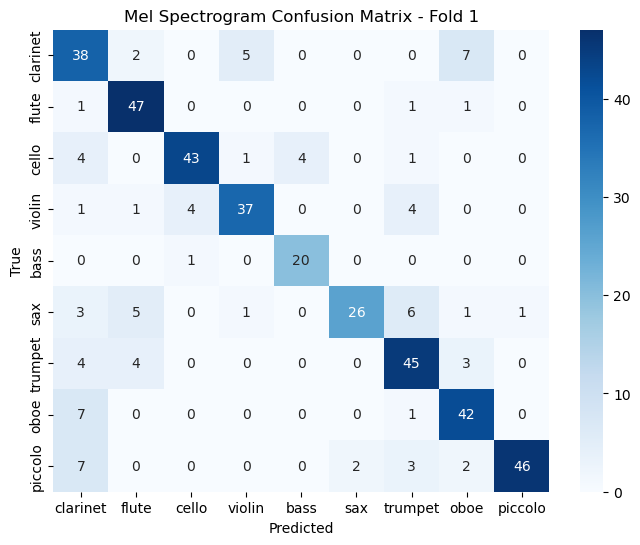

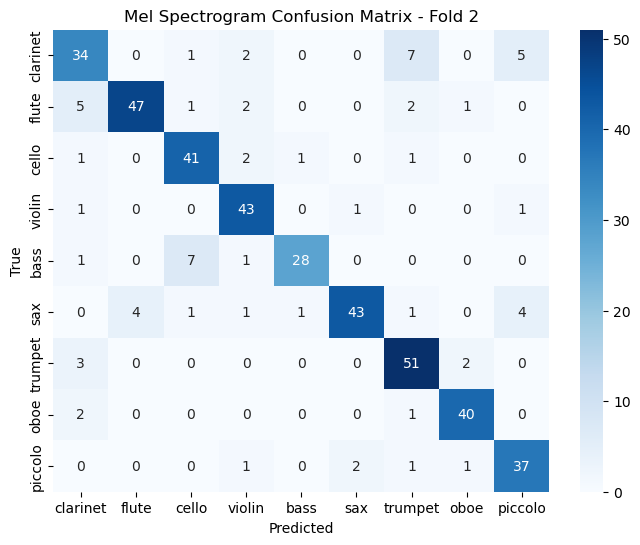

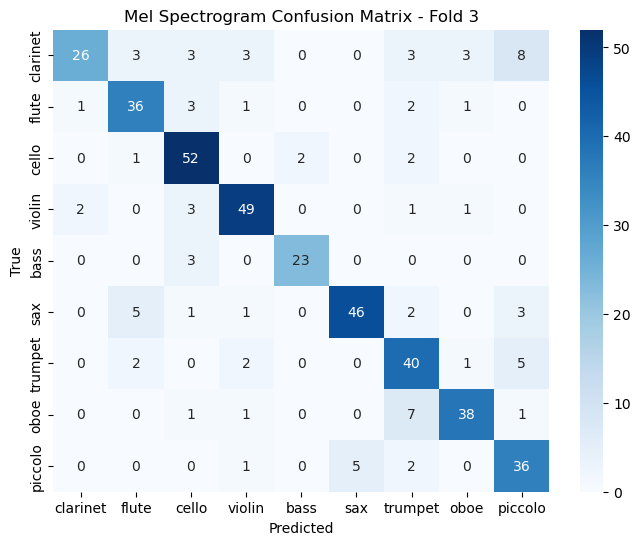

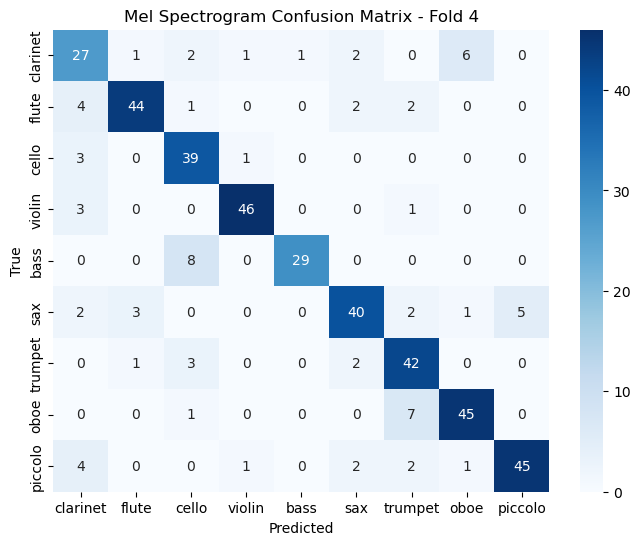

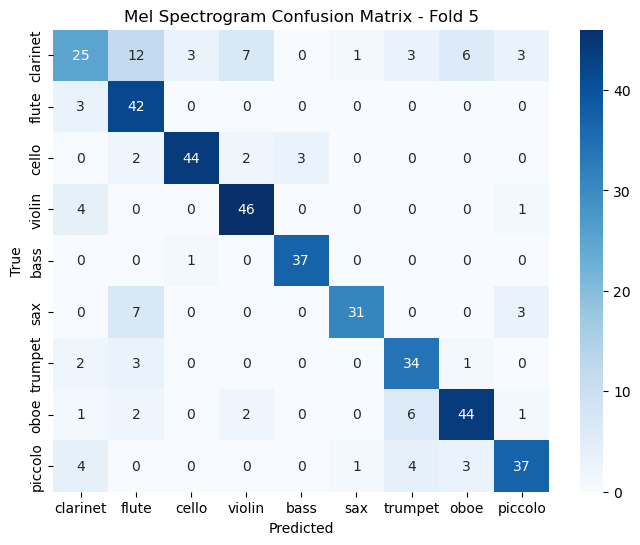


Mfcc Model
Accuracies: [0.6689814925193787, 0.6273148059844971, 0.6203703880310059, 0.7291666865348816, 0.7169373631477356]
Mean: 0.6726, Std: 0.0446, Min: 0.6204, Max: 0.7292


precision    recall  f1-score     support
clarinet       0.420290  0.557692  0.479339   52.000000
flute          0.722222  0.520000  0.604651   50.000000
cello          0.857143  0.452830  0.592593   53.000000
violin         0.616667  0.787234  0.691589   47.000000
bass           0.857143  0.857143  0.857143   21.000000
sax            0.438356  0.744186  0.551724   43.000000
trumpet        0.833333  0.714286  0.769231   56.000000
oboe           0.795918  0.780000  0.787879   50.000000
piccolo        0.916667  0.733333  0.814815   60.000000
accuracy       0.668981  0.668981  0.668981    0.668981
macro avg      0.717527  0.682967  0.683218  432.000000
weighted avg   0.719190  0.668981  0.676283  432.000000

precision    recall  f1-score     support
clarinet       0.490909  0.551020  0.519231   49.000000
flute          0.866667  0.224138  0.356164   58.000000
cello          0.350877  0.869565  0.500000   46.000000
violin         0.838710  0.565217  0.675325   46.000000
bass           0.933333  0.756757  0.835821   37.000000
sax            0.575000  0.418182  0.484211   55.000000
trumpet        0.723077  0.839286  0.776860   56.000000
oboe           1.000000  0.767442  0.868421   43.000000
piccolo        0.693878  0.809524  0.747253   42.000000
accuracy       0.627315  0.627315  0.627315    0.627315
macro avg      0.719161  0.644570  0.640365  432.000000
weighted avg   0.712583  0.627315  0.624890  432.000000

precision    recall  f1-score    support
clarinet       0.428571  0.244898  0.311688   49.00000
flute          0.558140  0.545455  0.551724   44.00000
cello          0.935484  0.508772  0.659091   57.00000
violin         0.954545  0.375000  0.538462   56.00000
bass           0.741935  0.884615  0.807018   26.00000
sax            0.615385  0.689655  0.650407   58.00000
trumpet        0.462500  0.740000  0.569231   50.00000
oboe           0.655738  0.833333  0.733945   48.00000
piccolo        0.591549  0.954545  0.730435   44.00000
accuracy       0.620370  0.620370  0.620370    0.62037
macro avg      0.660427  0.641808  0.616889  432.00000
weighted avg   0.666543  0.620370  0.606034  432.00000

precision    recall  f1-score     support
clarinet       0.500000  0.425000  0.459459   40.000000
flute          0.775862  0.849057  0.810811   53.000000
cello          0.705882  0.837209  0.765957   43.000000
violin         0.804878  0.660000  0.725275   50.000000
bass           1.000000  0.621622  0.766667   37.000000
sax            0.694915  0.773585  0.732143   53.000000
trumpet        0.673913  0.645833  0.659574   48.000000
oboe           0.732143  0.773585  0.752294   53.000000
piccolo        0.750000  0.872727  0.806723   55.000000
accuracy       0.729167  0.729167  0.729167    0.729167
macro avg      0.737510  0.717624  0.719878  432.000000
weighted avg   0.735994  0.729167  0.725978  432.000000

precision    recall  f1-score     support
clarinet       0.600000  0.450000  0.514286   60.000000
flute          0.780000  0.866667  0.821053   45.000000
cello          0.775510  0.745098  0.760000   51.000000
violin         0.727273  0.627451  0.673684   51.000000
bass           0.918919  0.894737  0.906667   38.000000
sax            0.600000  0.512195  0.552632   41.000000
trumpet        0.636364  0.700000  0.666667   40.000000
oboe           0.793651  0.892857  0.840336   56.000000
piccolo        0.625000  0.816327  0.707965   49.000000
accuracy       0.716937  0.716937  0.716937    0.716937
macro avg      0.717413  0.722815  0.715921  431.000000
weighted avg   0.714118  0.716937  0.711019  431.000000

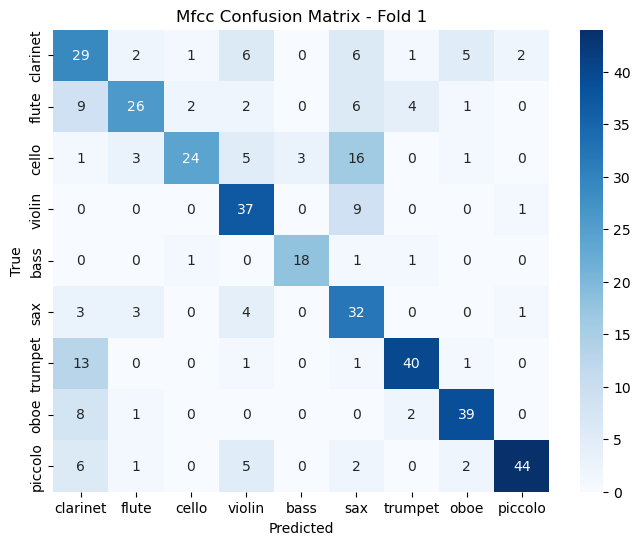

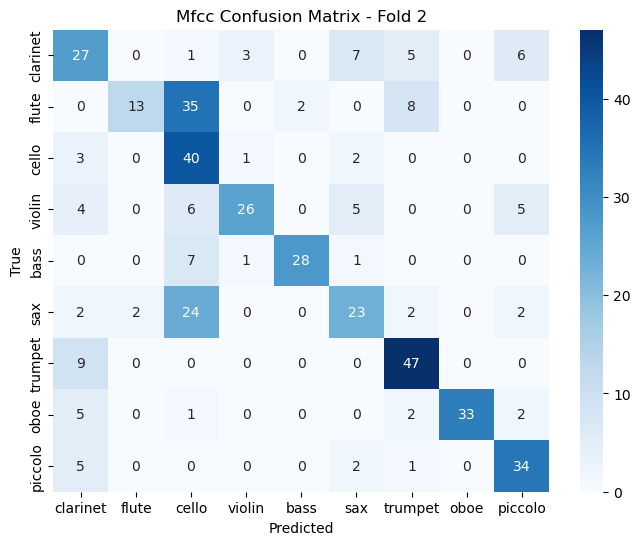

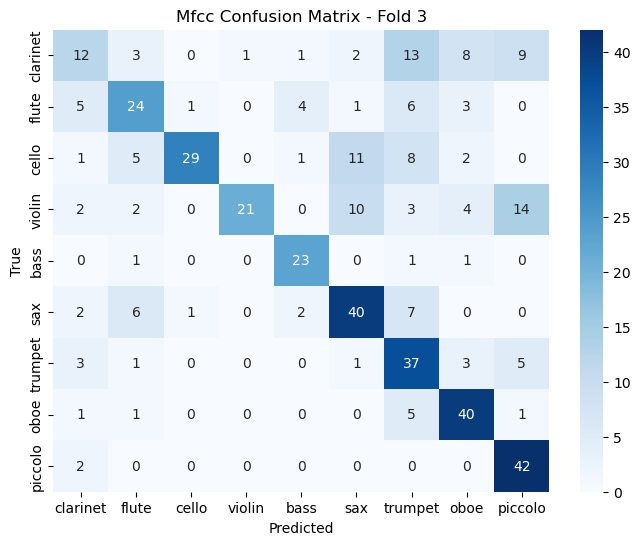

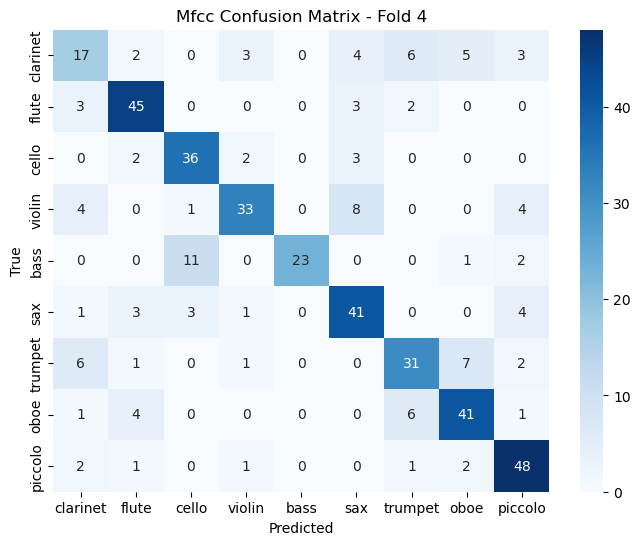

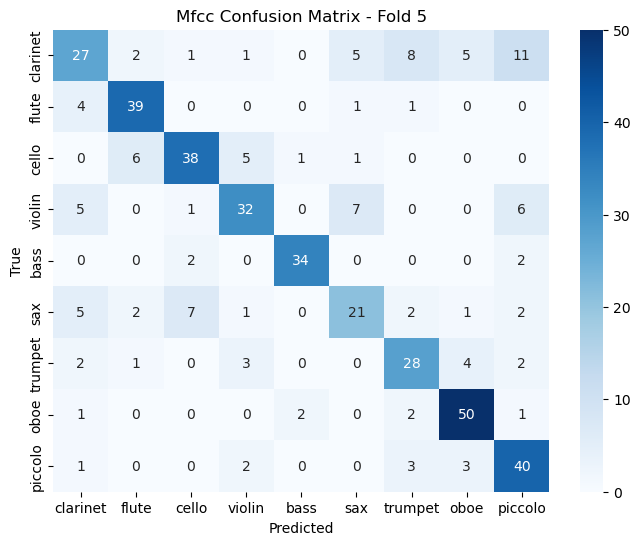


Chromagram Model
Accuracies: [0.30787035822868347, 0.2708333432674408, 0.27546295523643494, 0.4027777910232544, 0.34106728434562683]
Mean: 0.3196, Std: 0.0487, Min: 0.2708, Max: 0.4028


precision    recall  f1-score    support
clarinet       0.285714  0.153846  0.200000   52.00000
flute          0.525000  0.420000  0.466667   50.00000
cello          0.454545  0.094340  0.156250   53.00000
violin         0.202247  0.382979  0.264706   47.00000
bass           1.000000  0.428571  0.600000   21.00000
sax            0.375000  0.069767  0.117647   43.00000
trumpet        0.257669  0.750000  0.383562   56.00000
oboe           0.287879  0.380000  0.327586   50.00000
piccolo        0.444444  0.133333  0.205128   60.00000
accuracy       0.307870  0.307870  0.307870    0.30787
macro avg      0.425833  0.312537  0.302394  432.00000
weighted avg   0.387312  0.307870  0.283058  432.00000

precision    recall  f1-score     support
clarinet       0.104651  0.183673  0.133333   49.000000
flute          0.500000  0.275862  0.355556   58.000000
cello          1.000000  0.021739  0.042553   46.000000
violin         0.238095  0.108696  0.149254   46.000000
bass           0.324675  0.675676  0.438596   37.000000
sax            0.266667  0.145455  0.188235   55.000000
trumpet        0.625000  0.178571  0.277778   56.000000
oboe           0.265957  0.581395  0.364964   43.000000
piccolo        0.240000  0.428571  0.307692   42.000000
accuracy       0.270833  0.270833  0.270833    0.270833
macro avg      0.396116  0.288849  0.250885  432.000000
weighted avg   0.403417  0.270833  0.247064  432.000000

precision    recall  f1-score     support
clarinet       0.136364  0.061224  0.084507   49.000000
flute          0.279070  0.272727  0.275862   44.000000
cello          0.000000  0.000000  0.000000   57.000000
violin         0.240000  0.321429  0.274809   56.000000
bass           0.700000  0.538462  0.608696   26.000000
sax            0.166667  0.086207  0.113636   58.000000
trumpet        0.202247  0.720000  0.315789   50.000000
oboe           0.605263  0.479167  0.534884   48.000000
piccolo        0.320000  0.181818  0.231884   44.000000
accuracy       0.275463  0.275463  0.275463    0.275463
macro avg      0.294401  0.295670  0.271119  432.000000
weighted avg   0.262761  0.275463  0.244796  432.000000

precision    recall  f1-score     support
clarinet       0.224719  0.500000  0.310078   40.000000
flute          0.322581  0.566038  0.410959   53.000000
cello          0.375000  0.418605  0.395604   43.000000
violin         0.409091  0.180000  0.250000   50.000000
bass           0.578947  0.594595  0.586667   37.000000
sax            0.333333  0.150943  0.207792   53.000000
trumpet        0.580000  0.604167  0.591837   48.000000
oboe           0.647059  0.415094  0.505747   53.000000
piccolo        0.470588  0.290909  0.359551   55.000000
accuracy       0.402778  0.402778  0.402778    0.402778
macro avg      0.437924  0.413372  0.402026  432.000000
weighted avg   0.439281  0.402778  0.396765  432.000000

precision    recall  f1-score     support
clarinet       0.214286  0.150000  0.176471   60.000000
flute          0.396226  0.466667  0.428571   45.000000
cello          0.500000  0.196078  0.281690   51.000000
violin         0.193103  0.549020  0.285714   51.000000
bass           0.947368  0.473684  0.631579   38.000000
sax            0.244444  0.268293  0.255814   41.000000
trumpet        0.322581  0.500000  0.392157   40.000000
oboe           0.733333  0.392857  0.511628   56.000000
piccolo        0.533333  0.163265  0.250000   49.000000
accuracy       0.341067  0.341067  0.341067    0.341067
macro avg      0.453853  0.351096  0.357069  431.000000
weighted avg   0.445849  0.341067  0.347767  431.000000

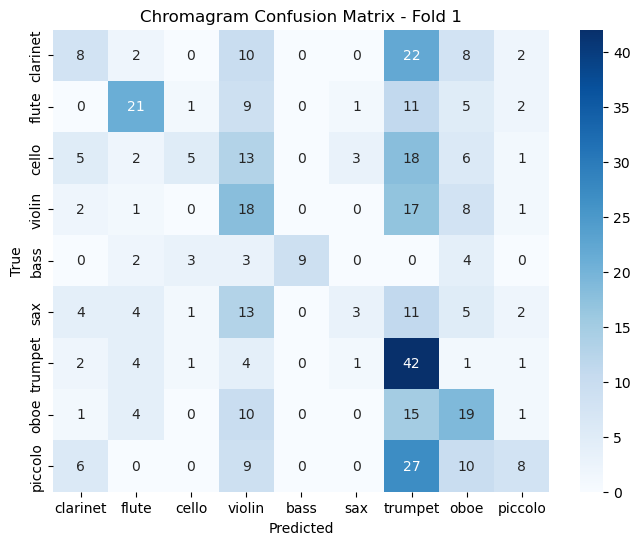

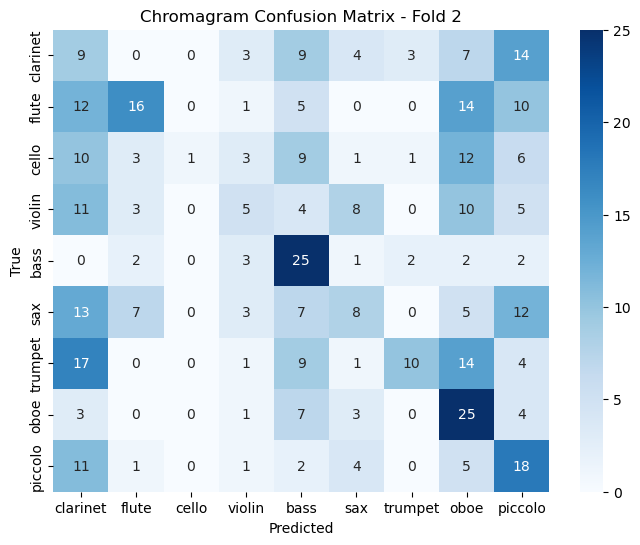

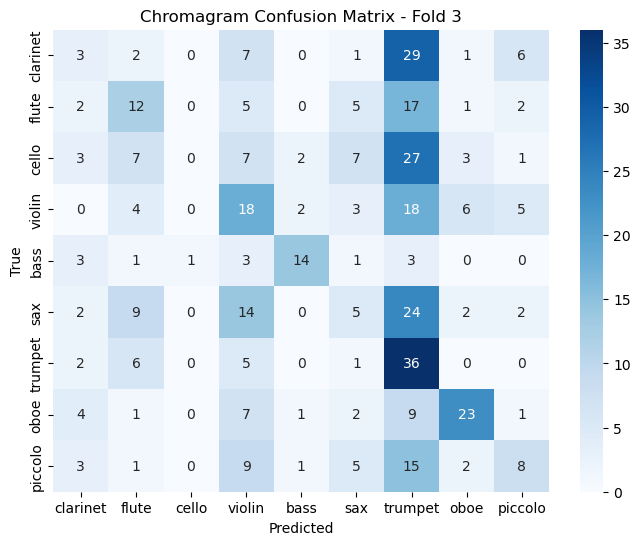

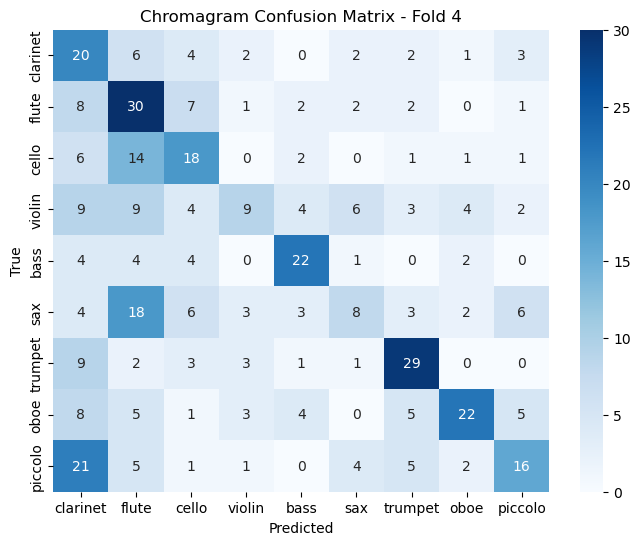

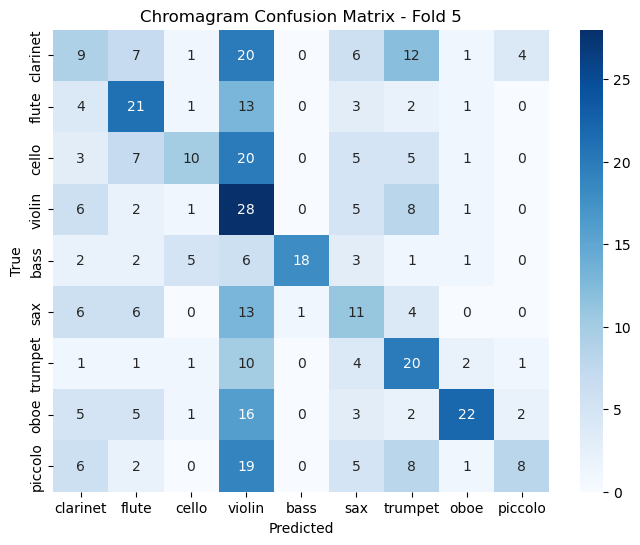


Spectral Contrast Model
Accuracies: [0.3611111044883728, 0.4305555522441864, 0.4513888955116272, 0.35879629850387573, 0.4106728434562683]
Mean: 0.4025, Std: 0.0371, Min: 0.3588, Max: 0.4514


precision    recall  f1-score     support
clarinet       0.342105  0.250000  0.288889   52.000000
flute          0.543478  0.500000  0.520833   50.000000
cello          0.368421  0.396226  0.381818   53.000000
violin         0.300000  0.446809  0.358974   47.000000
bass           0.327869  0.952381  0.487805   21.000000
sax            0.214286  0.209302  0.211765   43.000000
trumpet        0.270833  0.232143  0.250000   56.000000
oboe           0.521739  0.240000  0.328767   50.000000
piccolo        0.468085  0.366667  0.411215   60.000000
accuracy       0.361111  0.361111  0.361111    0.361111
macro avg      0.372980  0.399281  0.360007  432.000000
weighted avg   0.379694  0.361111  0.353317  432.000000

precision    recall  f1-score     support
clarinet       0.343750  0.448980  0.389381   49.000000
flute          0.638889  0.396552  0.489362   58.000000
cello          0.434783  0.434783  0.434783   46.000000
violin         0.705882  0.260870  0.380952   46.000000
bass           0.604651  0.702703  0.650000   37.000000
sax            0.285714  0.290909  0.288288   55.000000
trumpet        0.329787  0.553571  0.413333   56.000000
oboe           0.705882  0.279070  0.400000   43.000000
piccolo        0.406780  0.571429  0.475248   42.000000
accuracy       0.430556  0.430556  0.430556    0.430556
macro avg      0.495124  0.437652  0.435705  432.000000
weighted avg   0.486949  0.430556  0.428702  432.000000

precision    recall  f1-score     support
clarinet       0.391304  0.183673  0.250000   49.000000
flute          0.476190  0.454545  0.465116   44.000000
cello          0.467742  0.508772  0.487395   57.000000
violin         0.439252  0.839286  0.576687   56.000000
bass           0.625000  0.576923  0.600000   26.000000
sax            0.388889  0.362069  0.375000   58.000000
trumpet        0.361111  0.260000  0.302326   50.000000
oboe           0.681818  0.312500  0.428571   48.000000
piccolo        0.419355  0.590909  0.490566   44.000000
accuracy       0.451389  0.451389  0.451389    0.451389
macro avg      0.472296  0.454298  0.441740  432.000000
weighted avg   0.461634  0.451389  0.433828  432.000000

precision    recall  f1-score     support
clarinet       0.200000  0.525000  0.289655   40.000000
flute          0.681818  0.283019  0.400000   53.000000
cello          0.562500  0.209302  0.305085   43.000000
violin         0.500000  0.280000  0.358974   50.000000
bass           0.595238  0.675676  0.632911   37.000000
sax            0.338235  0.433962  0.380165   53.000000
trumpet        0.214286  0.500000  0.300000   48.000000
oboe           1.000000  0.094340  0.172414   53.000000
piccolo        0.558824  0.345455  0.426966   55.000000
accuracy       0.358796  0.358796  0.358796    0.358796
macro avg      0.516767  0.371861  0.362908  432.000000
weighted avg   0.526146  0.358796  0.357503  432.000000

precision    recall  f1-score     support
clarinet       0.251748  0.600000  0.354680   60.000000
flute          0.542857  0.422222  0.475000   45.000000
cello          0.833333  0.098039  0.175439   51.000000
violin         0.419355  0.254902  0.317073   51.000000
bass           0.794118  0.710526  0.750000   38.000000
sax            0.500000  0.024390  0.046512   41.000000
trumpet        0.265625  0.425000  0.326923   40.000000
oboe           0.550000  0.589286  0.568966   56.000000
piccolo        0.464286  0.530612  0.495238   49.000000
accuracy       0.410673  0.410673  0.410673    0.410673
macro avg      0.513480  0.406109  0.389981  431.000000
weighted avg   0.506432  0.410673  0.388368  431.000000

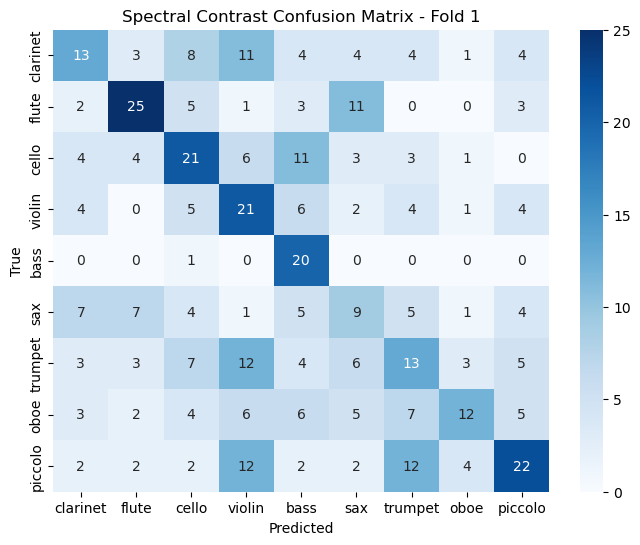

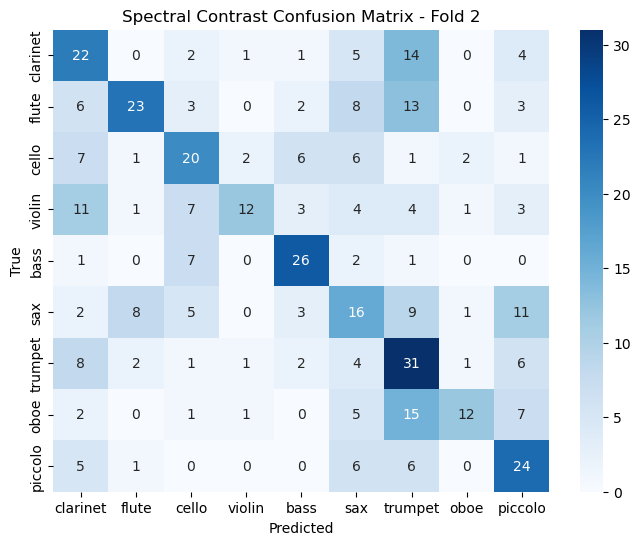

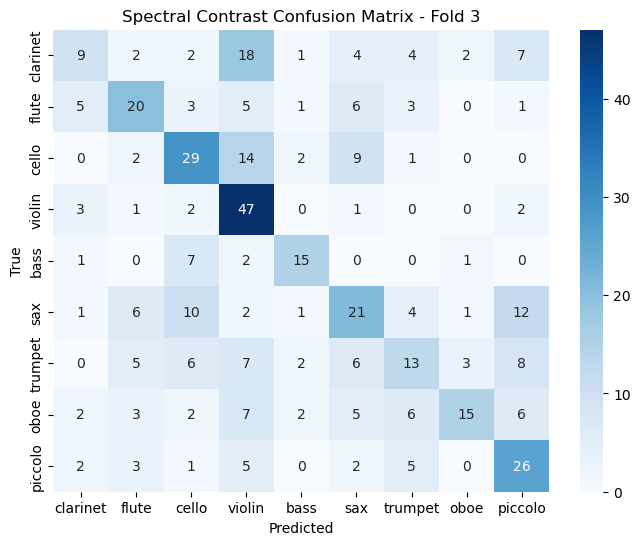

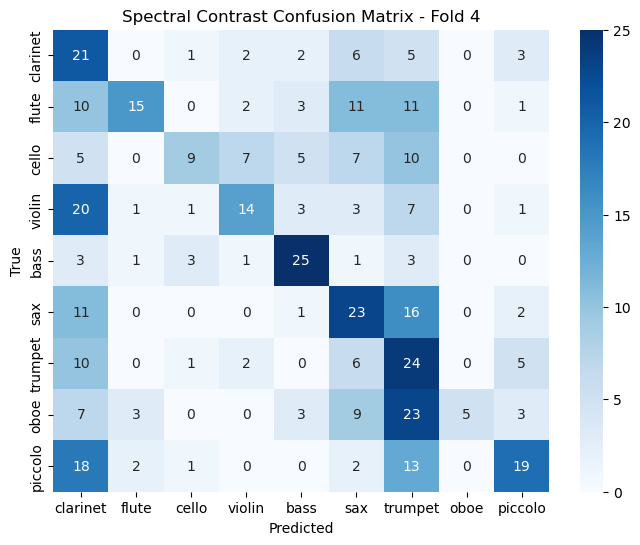

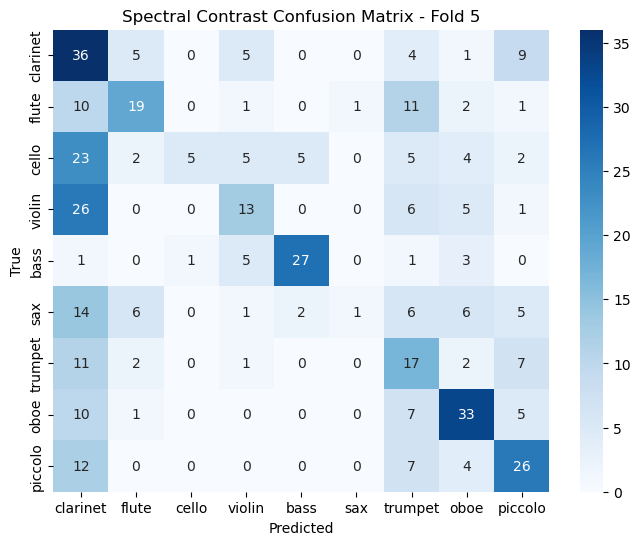


Tonnetz Model
Accuracies: [0.3472222089767456, 0.3194444477558136, 0.30092594027519226, 0.3263888955116272, 0.3735498785972595]
Mean: 0.3335, Std: 0.0249, Min: 0.3009, Max: 0.3735


precision    recall  f1-score     support
clarinet       0.352941  0.346154  0.349515   52.000000
flute          0.565217  0.260000  0.356164   50.000000
cello          0.444444  0.150943  0.225352   53.000000
violin         0.295918  0.617021  0.400000   47.000000
bass           0.666667  0.285714  0.400000   21.000000
sax            0.210526  0.093023  0.129032   43.000000
trumpet        0.323944  0.410714  0.362205   56.000000
oboe           0.287129  0.580000  0.384106   50.000000
piccolo        0.476190  0.333333  0.392157   60.000000
accuracy       0.347222  0.347222  0.347222    0.347222
macro avg      0.402553  0.341878  0.333170  432.000000
weighted avg   0.389349  0.347222  0.332623  432.000000

precision    recall  f1-score     support
clarinet       0.372093  0.326531  0.347826   49.000000
flute          0.725000  0.500000  0.591837   58.000000
cello          0.177570  0.413043  0.248366   46.000000
violin         0.220779  0.369565  0.276423   46.000000
bass           0.733333  0.297297  0.423077   37.000000
sax            0.209302  0.163636  0.183673   55.000000
trumpet        0.500000  0.196429  0.282051   56.000000
oboe           0.283019  0.348837  0.312500   43.000000
piccolo        0.343750  0.261905  0.297297   42.000000
accuracy       0.319444  0.319444  0.319444    0.319444
macro avg      0.396094  0.319694  0.329228  432.000000
weighted avg   0.397822  0.319444  0.330984  432.000000

precision    recall  f1-score     support
clarinet       0.188976  0.489796  0.272727   49.000000
flute          0.454545  0.454545  0.454545   44.000000
cello          0.333333  0.105263  0.160000   57.000000
violin         0.378378  0.250000  0.301075   56.000000
bass           0.400000  0.615385  0.484848   26.000000
sax            0.266667  0.137931  0.181818   58.000000
trumpet        0.407407  0.440000  0.423077   50.000000
oboe           0.285714  0.333333  0.307692   48.000000
piccolo        0.153846  0.090909  0.114286   44.000000
accuracy       0.300926  0.300926  0.300926    0.300926
macro avg      0.318763  0.324129  0.300008  432.000000
weighted avg   0.315207  0.300926  0.285757  432.000000

precision    recall  f1-score     support
clarinet       0.296296  0.400000  0.340426   40.000000
flute          0.793103  0.433962  0.560976   53.000000
cello          0.228571  0.186047  0.205128   43.000000
violin         0.326531  0.320000  0.323232   50.000000
bass           0.733333  0.297297  0.423077   37.000000
sax            0.222222  0.188679  0.204082   53.000000
trumpet        0.272727  0.125000  0.171429   48.000000
oboe           0.237179  0.698113  0.354067   53.000000
piccolo        0.518519  0.254545  0.341463   55.000000
accuracy       0.326389  0.326389  0.326389    0.326389
macro avg      0.403165  0.322627  0.324875  432.000000
weighted avg   0.400770  0.326389  0.325407  432.000000

precision    recall  f1-score    support
clarinet       0.456522  0.350000  0.396226   60.00000
flute          0.517241  0.666667  0.582524   45.00000
cello          0.529412  0.176471  0.264706   51.00000
violin         0.365385  0.372549  0.368932   51.00000
bass           0.606061  0.526316  0.563380   38.00000
sax            0.157895  0.365854  0.220588   41.00000
trumpet        0.272727  0.150000  0.193548   40.00000
oboe           0.500000  0.517857  0.508772   56.00000
piccolo        0.240000  0.244898  0.242424   49.00000
accuracy       0.373550  0.373550  0.373550    0.37355
macro avg      0.405027  0.374512  0.371234  431.00000
weighted avg   0.409454  0.373550  0.373242  431.00000

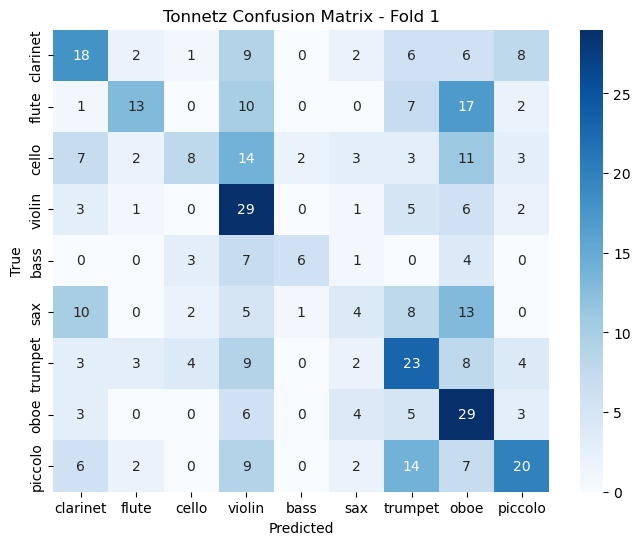

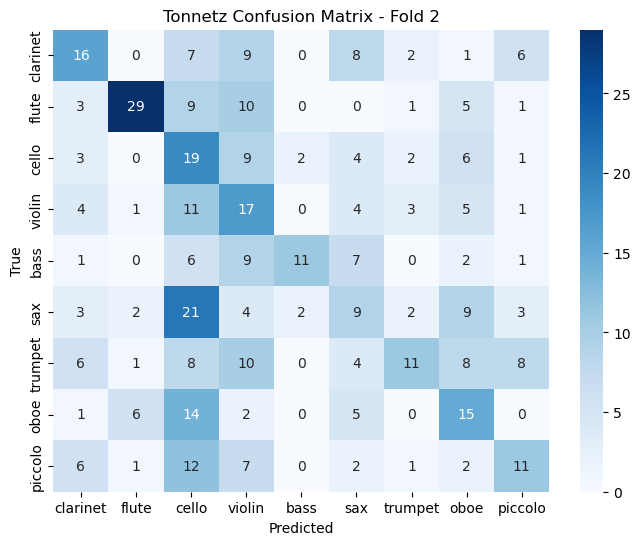

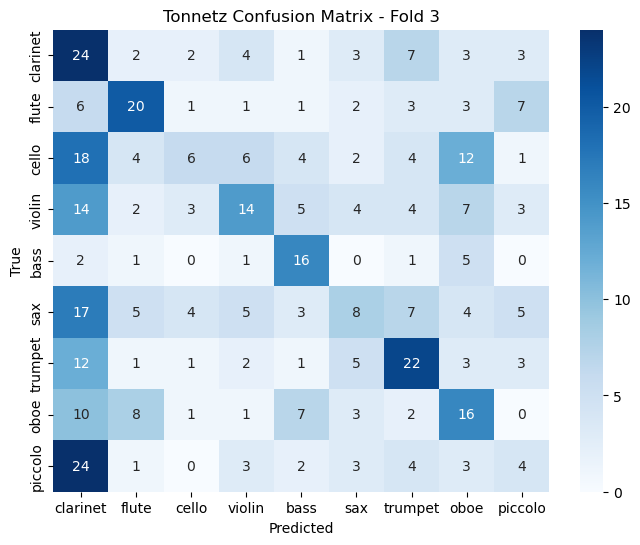

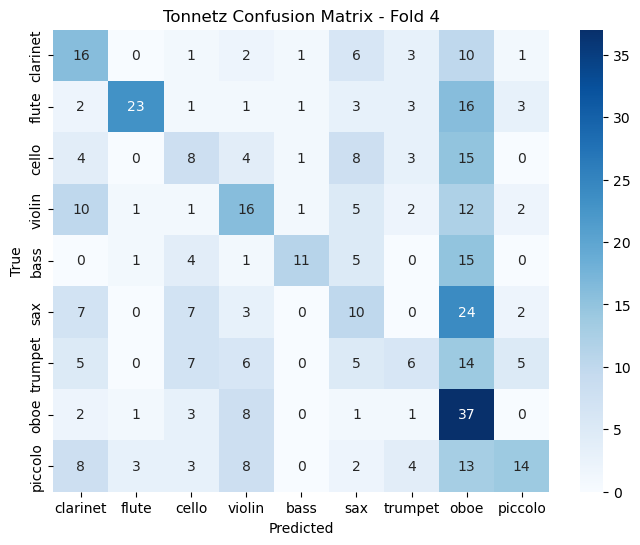

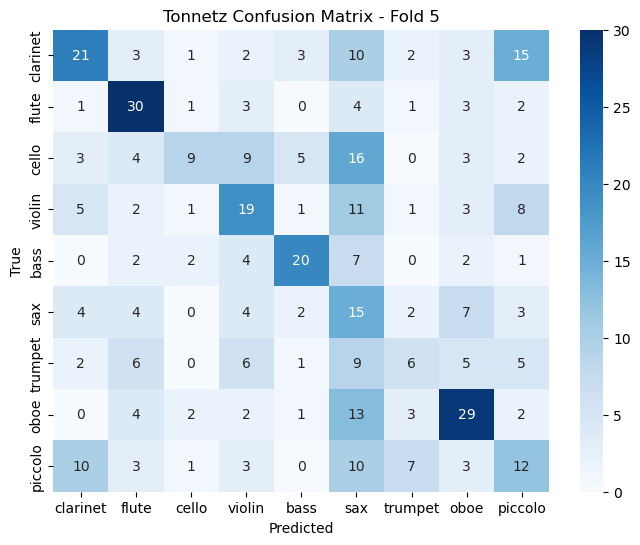


Constant Q Model
Accuracies: [0.5277777910232544, 0.6203703880310059, 0.7731481194496155, 0.7708333134651184, 0.7122969627380371]
Mean: 0.6809, Std: 0.0945, Min: 0.5278, Max: 0.7731


precision    recall  f1-score     support
clarinet       0.750000  0.057692  0.107143   52.000000
flute          0.777778  0.140000  0.237288   50.000000
cello          0.961538  0.471698  0.632911   53.000000
violin         0.623188  0.914894  0.741379   47.000000
bass           0.950000  0.904762  0.926829   21.000000
sax            0.535714  0.348837  0.422535   43.000000
trumpet        0.276471  0.839286  0.415929   56.000000
oboe           0.650000  0.520000  0.577778   50.000000
piccolo        0.651515  0.716667  0.682540   60.000000
accuracy       0.527778  0.527778  0.527778    0.527778
macro avg      0.686245  0.545982  0.527148  432.000000
weighted avg   0.667128  0.527778  0.501367  432.000000

precision    recall  f1-score    support
clarinet       0.739130  0.346939  0.472222   49.00000
flute          0.757576  0.431034  0.549451   58.00000
cello          0.714286  0.760870  0.736842   46.00000
violin         0.785714  0.717391  0.750000   46.00000
bass           1.000000  0.702703  0.825397   37.00000
sax            0.760870  0.636364  0.693069   55.00000
trumpet        0.313725  0.857143  0.459330   56.00000
oboe           0.781250  0.581395  0.666667   43.00000
piccolo        0.857143  0.571429  0.685714   42.00000
accuracy       0.620370  0.620370  0.620370    0.62037
macro avg      0.745522  0.622807  0.648744  432.00000
weighted avg   0.729553  0.620370  0.637151  432.00000

precision    recall  f1-score     support
clarinet       0.771429  0.551020  0.642857   49.000000
flute          0.723404  0.772727  0.747253   44.000000
cello          0.910714  0.894737  0.902655   57.000000
violin         0.774194  0.857143  0.813559   56.000000
bass           1.000000  0.846154  0.916667   26.000000
sax            0.851852  0.793103  0.821429   58.000000
trumpet        0.610169  0.720000  0.660550   50.000000
oboe           0.791667  0.791667  0.791667   48.000000
piccolo        0.653061  0.727273  0.688172   44.000000
accuracy       0.773148  0.773148  0.773148    0.773148
macro avg      0.787388  0.772647  0.776090  432.000000
weighted avg   0.781356  0.773148  0.773549  432.000000

precision    recall  f1-score     support
clarinet       0.521739  0.600000  0.558140   40.000000
flute          0.750000  0.792453  0.770642   53.000000
cello          0.875000  0.813953  0.843373   43.000000
violin         0.976744  0.840000  0.903226   50.000000
bass           1.000000  0.918919  0.957746   37.000000
sax            0.787234  0.698113  0.740000   53.000000
trumpet        0.515152  0.708333  0.596491   48.000000
oboe           0.840909  0.698113  0.762887   53.000000
piccolo        0.857143  0.872727  0.864865   55.000000
accuracy       0.770833  0.770833  0.770833    0.770833
macro avg      0.791547  0.771401  0.777486  432.000000
weighted avg   0.792230  0.770833  0.777511  432.000000

precision    recall  f1-score     support
clarinet       0.482759  0.466667  0.474576   60.000000
flute          0.702128  0.733333  0.717391   45.000000
cello          0.930233  0.784314  0.851064   51.000000
violin         0.675676  0.980392  0.800000   51.000000
bass           0.844444  1.000000  0.915663   38.000000
sax            0.884615  0.560976  0.686567   41.000000
trumpet        0.608696  0.700000  0.651163   40.000000
oboe           0.960000  0.428571  0.592593   56.000000
piccolo        0.641791  0.877551  0.741379   49.000000
accuracy       0.712297  0.712297  0.712297    0.712297
macro avg      0.747816  0.725756  0.714488  431.000000
weighted avg   0.743332  0.712297  0.704095  431.000000

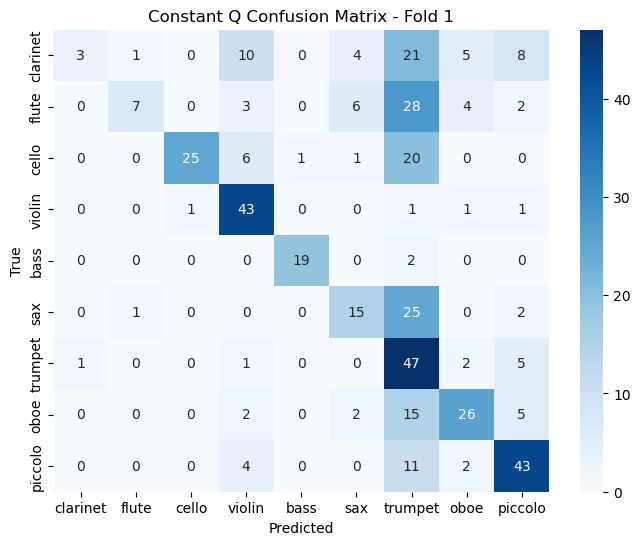

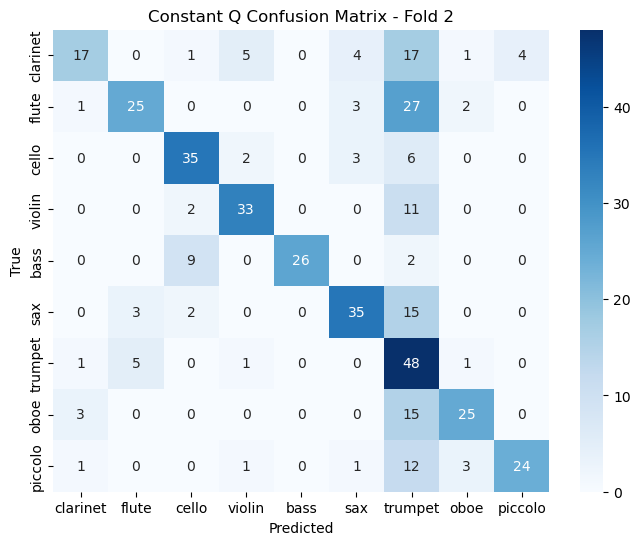

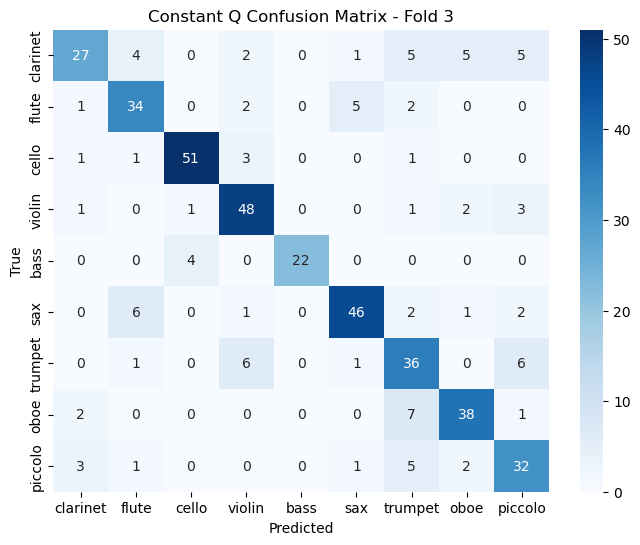

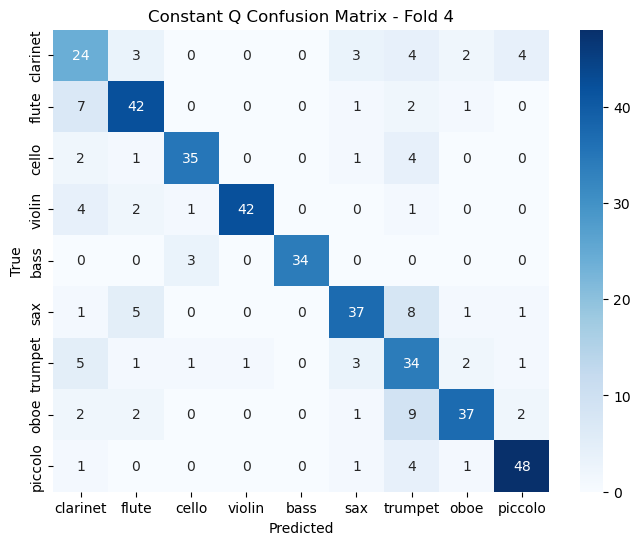

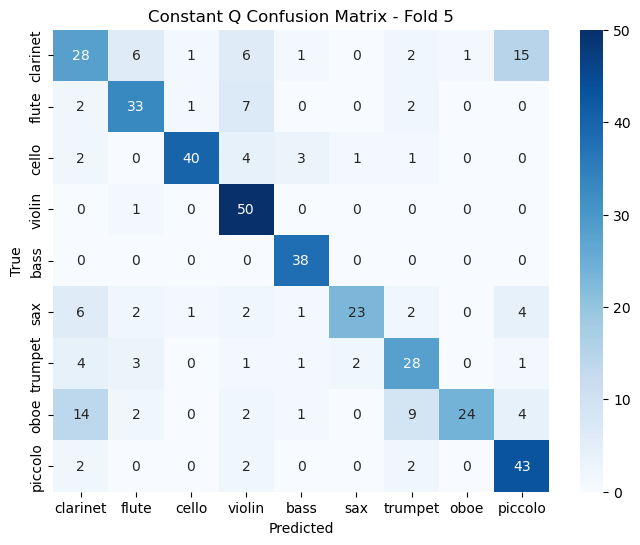


Cqt Model
Accuracies: [0.7731481194496155, 0.8032407164573669, 0.7291666865348816, 0.8009259104728699, 0.7192575335502625]
Mean: 0.7651, Std: 0.0352, Min: 0.7193, Max: 0.8032


precision    recall  f1-score     support
clarinet       0.743590  0.557692  0.637363   52.000000
flute          0.857143  0.840000  0.848485   50.000000
cello          0.859649  0.924528  0.890909   53.000000
violin         0.821429  0.978723  0.893204   47.000000
bass           0.952381  0.952381  0.952381   21.000000
sax            0.697674  0.697674  0.697674   43.000000
trumpet        0.672131  0.732143  0.700855   56.000000
oboe           0.725490  0.740000  0.732673   50.000000
piccolo        0.727273  0.666667  0.695652   60.000000
accuracy       0.773148  0.773148  0.773148    0.773148
macro avg      0.784084  0.787757  0.783244  432.000000
weighted avg   0.771395  0.773148  0.769413  432.000000

precision    recall  f1-score     support
clarinet       0.771429  0.551020  0.642857   49.000000
flute          0.796610  0.810345  0.803419   58.000000
cello          0.926829  0.826087  0.873563   46.000000
violin         0.793103  1.000000  0.884615   46.000000
bass           0.972973  0.972973  0.972973   37.000000
sax            0.782609  0.654545  0.712871   55.000000
trumpet        0.771930  0.785714  0.778761   56.000000
oboe           0.714286  0.930233  0.808081   43.000000
piccolo        0.767442  0.785714  0.776471   42.000000
accuracy       0.803241  0.803241  0.803241    0.803241
macro avg      0.810801  0.812959  0.805957  432.000000
weighted avg   0.806340  0.803241  0.798964  432.000000

precision    recall  f1-score     support
clarinet       0.696970  0.469388  0.560976   49.000000
flute          0.750000  0.613636  0.675000   44.000000
cello          0.864407  0.894737  0.879310   57.000000
violin         0.666667  0.964286  0.788321   56.000000
bass           1.000000  0.923077  0.960000   26.000000
sax            0.833333  0.689655  0.754717   58.000000
trumpet        0.492754  0.680000  0.571429   50.000000
oboe           0.804878  0.687500  0.741573   48.000000
piccolo        0.707317  0.659091  0.682353   44.000000
accuracy       0.729167  0.729167  0.729167    0.729167
macro avg      0.757369  0.731263  0.734853  432.000000
weighted avg   0.746489  0.729167  0.727728  432.000000

precision    recall  f1-score     support
clarinet       0.634146  0.650000  0.641975   40.000000
flute          0.842105  0.905660  0.872727   53.000000
cello          0.878049  0.837209  0.857143   43.000000
violin         0.978723  0.920000  0.948454   50.000000
bass           0.972222  0.945946  0.958904   37.000000
sax            0.646154  0.792453  0.711864   53.000000
trumpet        0.627907  0.562500  0.593407   48.000000
oboe           0.826087  0.716981  0.767677   53.000000
piccolo        0.857143  0.872727  0.864865   55.000000
accuracy       0.800926  0.800926  0.800926    0.800926
macro avg      0.806949  0.800386  0.801891  432.000000
weighted avg   0.805493  0.800926  0.801295  432.000000

precision    recall  f1-score     support
clarinet       0.720000  0.300000  0.423529   60.000000
flute          0.735849  0.866667  0.795918   45.000000
cello          0.945946  0.686275  0.795455   51.000000
violin         0.684932  0.980392  0.806452   51.000000
bass           1.000000  0.947368  0.972973   38.000000
sax            0.673913  0.756098  0.712644   41.000000
trumpet        0.465517  0.675000  0.551020   40.000000
oboe           0.732143  0.732143  0.732143   56.000000
piccolo        0.702128  0.673469  0.687500   49.000000
accuracy       0.719258  0.719258  0.719258    0.719258
macro avg      0.740047  0.735268  0.719737  431.000000
weighted avg   0.740472  0.719258  0.709617  431.000000

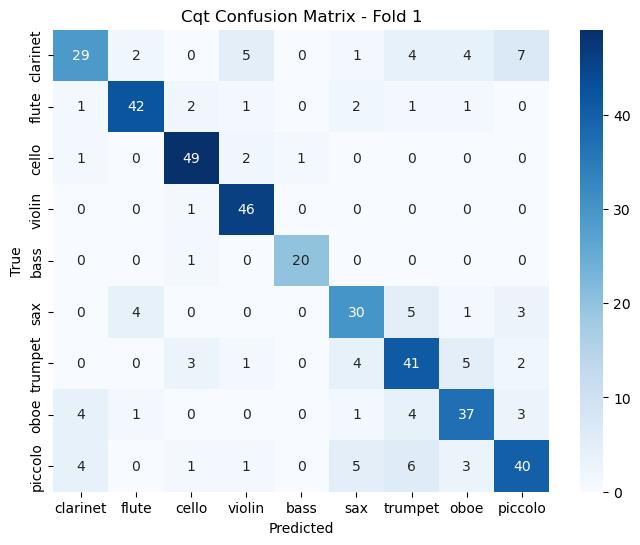

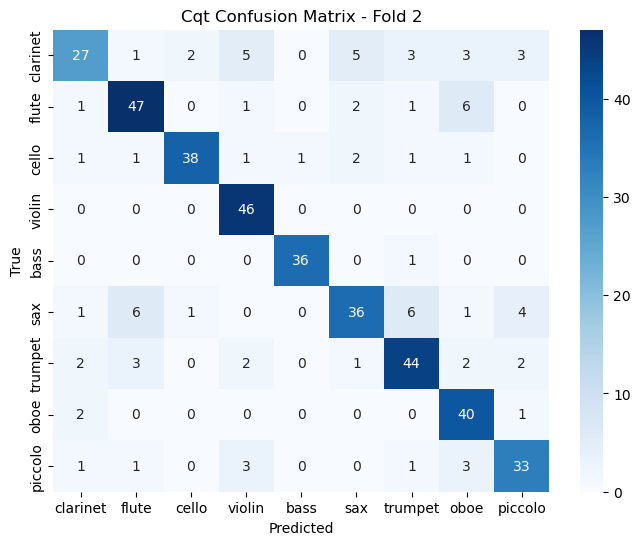

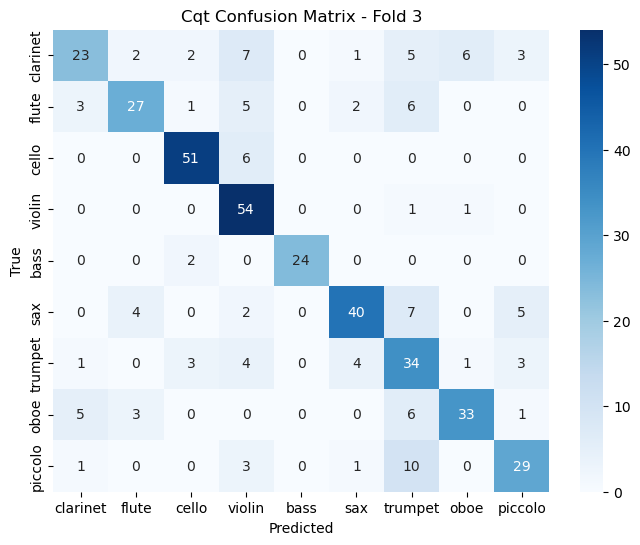

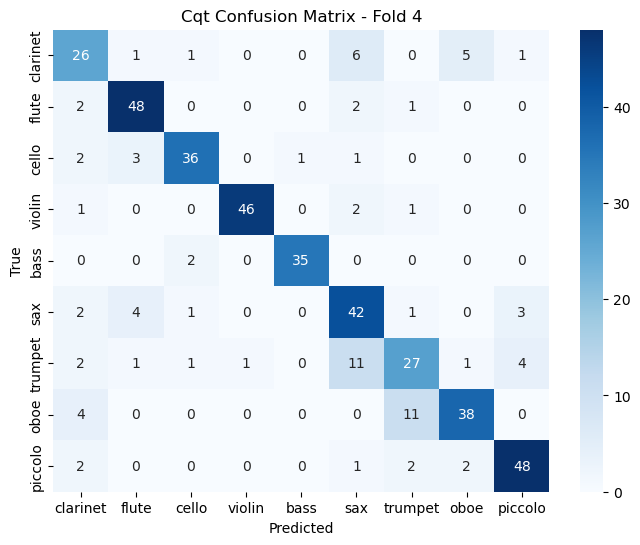

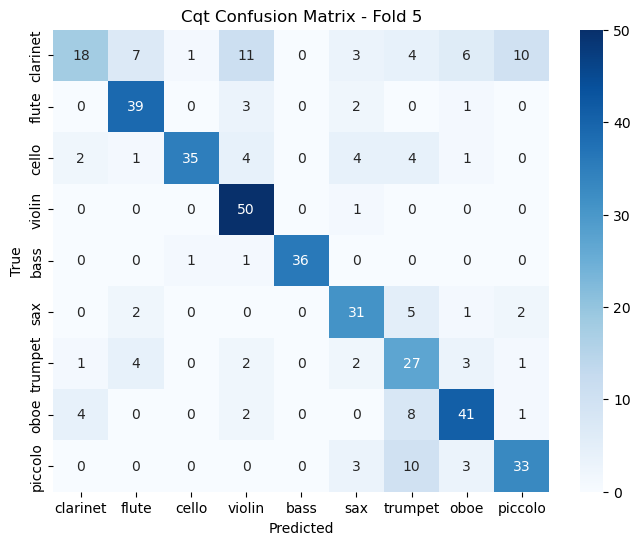


Stft Model
Accuracies: [0.49768519401550293, 0.46759259700775146, 0.5578703880310059, 0.41435185074806213, 0.6102088093757629]
Mean: 0.5095, Std: 0.0685, Min: 0.4144, Max: 0.6102


precision    recall  f1-score     support
clarinet       0.264706  0.173077  0.209302   52.000000
flute          0.666667  0.640000  0.653061   50.000000
cello          0.545455  0.452830  0.494845   53.000000
violin         0.342105  0.829787  0.484472   47.000000
bass           0.692308  0.857143  0.765957   21.000000
sax            0.666667  0.372093  0.477612   43.000000
trumpet        0.666667  0.214286  0.324324   56.000000
oboe           0.553571  0.620000  0.584906   50.000000
piccolo        0.500000  0.566667  0.531250   60.000000
accuracy       0.497685  0.497685  0.497685    0.497685
macro avg      0.544238  0.525098  0.502859  432.000000
weighted avg   0.533109  0.497685  0.482497  432.000000

precision    recall  f1-score     support
clarinet       0.265306  0.265306  0.265306   49.000000
flute          0.780488  0.551724  0.646465   58.000000
cello          0.470588  0.521739  0.494845   46.000000
violin         0.396226  0.456522  0.424242   46.000000
bass           0.738095  0.837838  0.784810   37.000000
sax            0.440000  0.400000  0.419048   55.000000
trumpet        0.375000  0.267857  0.312500   56.000000
oboe           0.571429  0.279070  0.375000   43.000000
piccolo        0.376471  0.761905  0.503937   42.000000
accuracy       0.467593  0.467593  0.467593    0.467593
macro avg      0.490400  0.482440  0.469573  432.000000
weighted avg   0.488506  0.467593  0.462150  432.000000

precision    recall  f1-score    support
clarinet       0.428571  0.183673  0.257143   49.00000
flute          0.527778  0.431818  0.475000   44.00000
cello          0.787234  0.649123  0.711538   57.00000
violin         0.534884  0.821429  0.647887   56.00000
bass           0.869565  0.769231  0.816327   26.00000
sax            0.653061  0.551724  0.598131   58.00000
trumpet        0.615385  0.320000  0.421053   50.00000
oboe           0.750000  0.562500  0.642857   48.00000
piccolo        0.324074  0.795455  0.460526   44.00000
accuracy       0.557870  0.557870  0.557870    0.55787
macro avg      0.610061  0.564995  0.558940  432.00000
weighted avg   0.603155  0.557870  0.551918  432.00000

precision    recall  f1-score     support
clarinet       0.163636  0.225000  0.189474   40.000000
flute          0.471429  0.622642  0.536585   53.000000
cello          0.615385  0.372093  0.463768   43.000000
violin         0.363636  0.640000  0.463768   50.000000
bass           0.800000  0.432432  0.561404   37.000000
sax            0.482143  0.509434  0.495413   53.000000
trumpet        0.000000  0.000000  0.000000   48.000000
oboe           1.000000  0.132075  0.233333   53.000000
piccolo        0.357798  0.709091  0.475610   55.000000
accuracy       0.414352  0.414352  0.414352    0.414352
macro avg      0.472670  0.404752  0.379928  432.000000
weighted avg   0.472238  0.414352  0.381256  432.000000

precision    recall  f1-score     support
clarinet       0.566667  0.283333  0.377778   60.000000
flute          0.631579  0.800000  0.705882   45.000000
cello          0.735294  0.490196  0.588235   51.000000
violin         0.600000  0.705882  0.648649   51.000000
bass           0.720000  0.947368  0.818182   38.000000
sax            0.567568  0.512195  0.538462   41.000000
trumpet        0.600000  0.300000  0.400000   40.000000
oboe           0.782609  0.642857  0.705882   56.000000
piccolo        0.453608  0.897959  0.602740   49.000000
accuracy       0.610209  0.610209  0.610209    0.610209
macro avg      0.628592  0.619977  0.598423  431.000000
weighted avg   0.629244  0.610209  0.593373  431.000000

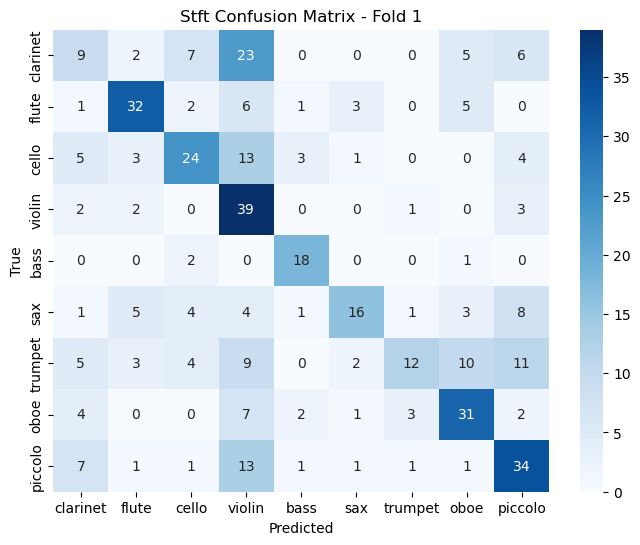

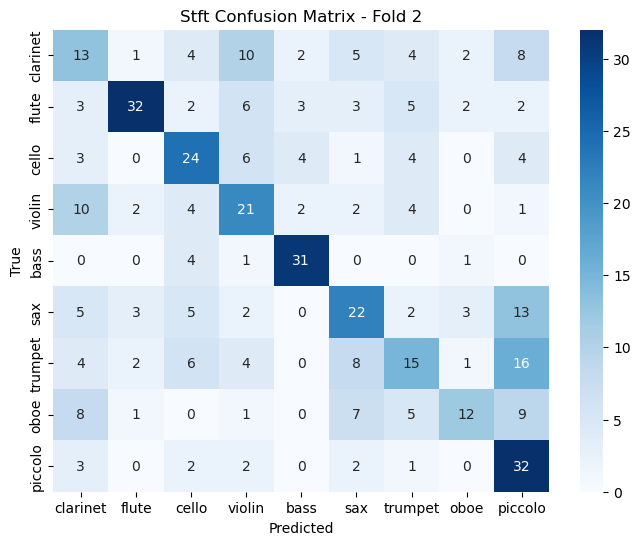

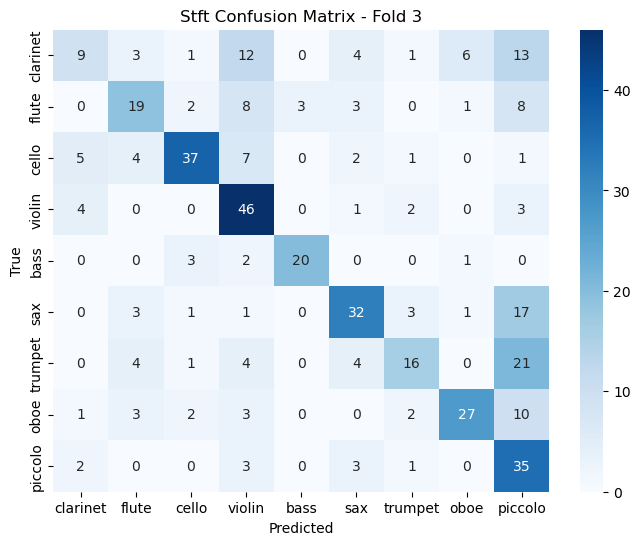

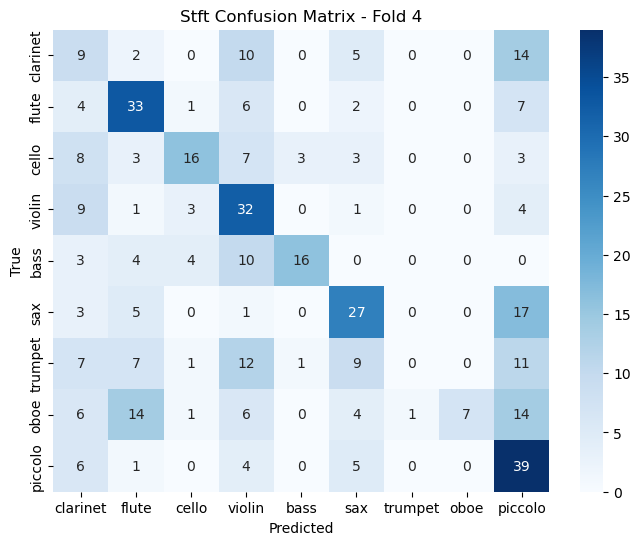

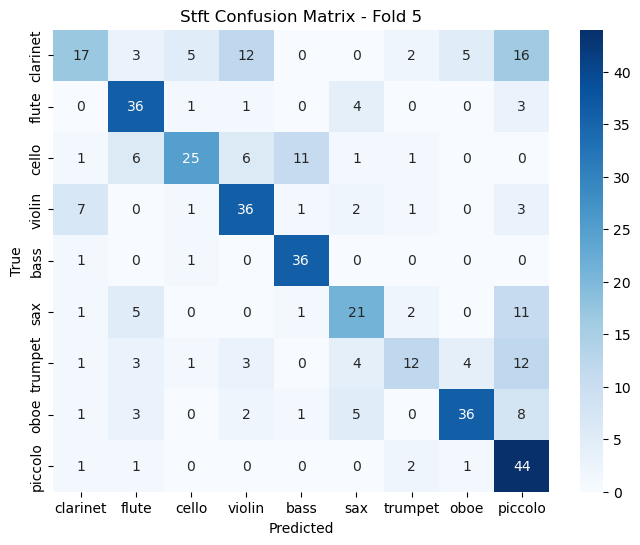


Harmonic Percussive Model
Accuracies: [0.5856481194496155, 0.5717592835426331, 0.6157407164573669, 0.6342592835426331, 0.6705336570739746]
Mean: 0.6156, Std: 0.0352, Min: 0.5718, Max: 0.6705


precision    recall  f1-score     support
clarinet       0.537500  0.826923  0.651515   52.000000
flute          0.545455  0.960000  0.695652   50.000000
cello          0.840000  0.396226  0.538462   53.000000
violin         0.548387  0.723404  0.623853   47.000000
bass           0.293103  0.809524  0.430380   21.000000
sax            0.739130  0.395349  0.515152   43.000000
trumpet        0.661538  0.767857  0.710744   56.000000
oboe           0.950000  0.380000  0.542857   50.000000
piccolo        1.000000  0.183333  0.309859   60.000000
accuracy       0.585648  0.585648  0.585648    0.585648
macro avg      0.679457  0.604735  0.557608  432.000000
weighted avg   0.712965  0.585648  0.563071  432.000000

precision    recall  f1-score     support
clarinet       0.257143  0.183673  0.214286   49.000000
flute          0.468750  0.775862  0.584416   58.000000
cello          0.692308  0.391304  0.500000   46.000000
violin         0.702703  0.565217  0.626506   46.000000
bass           0.658537  0.729730  0.692308   37.000000
sax            0.519481  0.727273  0.606061   55.000000
trumpet        0.548387  0.607143  0.576271   56.000000
oboe           0.848485  0.651163  0.736842   43.000000
piccolo        0.800000  0.476190  0.597015   42.000000
accuracy       0.571759  0.571759  0.571759    0.571759
macro avg      0.610644  0.567506  0.570412  432.000000
weighted avg   0.596504  0.571759  0.565264  432.000000

precision    recall  f1-score     support
clarinet       0.657143  0.469388  0.547619   49.000000
flute          0.425743  0.977273  0.593103   44.000000
cello          0.447917  0.754386  0.562092   57.000000
violin         0.872340  0.732143  0.796117   56.000000
bass           0.733333  0.846154  0.785714   26.000000
sax            0.875000  0.241379  0.378378   58.000000
trumpet        0.657143  0.460000  0.541176   50.000000
oboe           0.866667  0.541667  0.666667   48.000000
piccolo        0.738095  0.704545  0.720930   44.000000
accuracy       0.615741  0.615741  0.615741    0.615741
macro avg      0.697042  0.636326  0.621311  432.000000
weighted avg   0.699225  0.615741  0.608116  432.000000

precision    recall  f1-score     support
clarinet       0.285714  0.800000  0.421053   40.000000
flute          0.698413  0.830189  0.758621   53.000000
cello          0.653846  0.790698  0.715789   43.000000
violin         0.968750  0.620000  0.756098   50.000000
bass           0.725000  0.783784  0.753247   37.000000
sax            0.838710  0.490566  0.619048   53.000000
trumpet        0.618182  0.708333  0.660194   48.000000
oboe           0.920000  0.433962  0.589744   53.000000
piccolo        0.954545  0.381818  0.545455   55.000000
accuracy       0.634259  0.634259  0.634259    0.634259
macro avg      0.740351  0.648817  0.646583  432.000000
weighted avg   0.757423  0.634259  0.646431  432.000000

precision    recall  f1-score     support
clarinet       0.433735  0.600000  0.503497   60.000000
flute          0.578947  0.977778  0.727273   45.000000
cello          0.603774  0.627451  0.615385   51.000000
violin         0.703125  0.882353  0.782609   51.000000
bass           1.000000  0.736842  0.848485   38.000000
sax            1.000000  0.097561  0.177778   41.000000
trumpet        0.771429  0.675000  0.720000   40.000000
oboe           0.880952  0.660714  0.755102   56.000000
piccolo        0.782609  0.734694  0.757895   49.000000
accuracy       0.670534  0.670534  0.670534    0.670534
macro avg      0.750508  0.665821  0.654225  431.000000
weighted avg   0.733798  0.670534  0.654266  431.000000

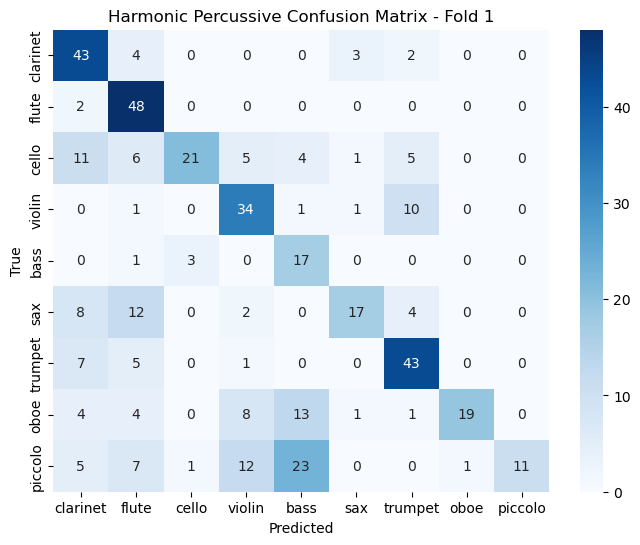

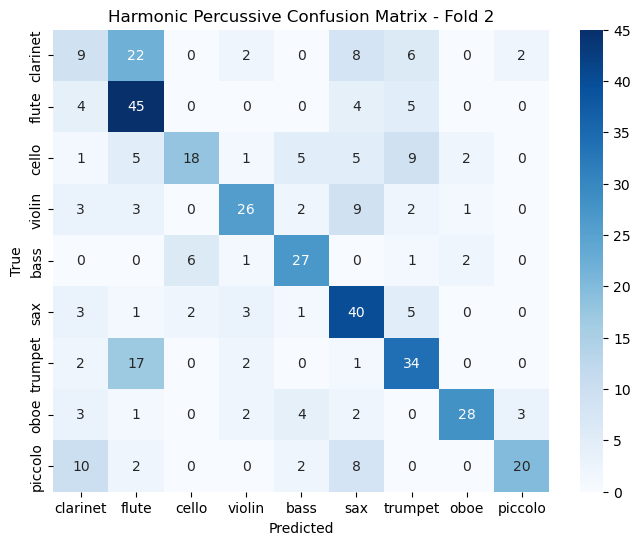

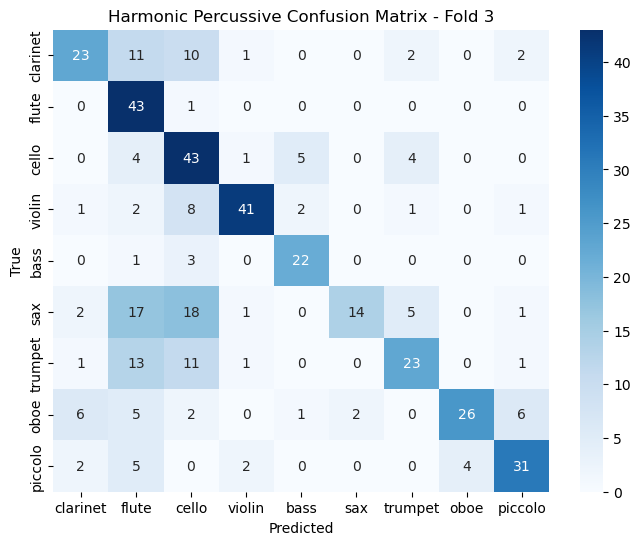

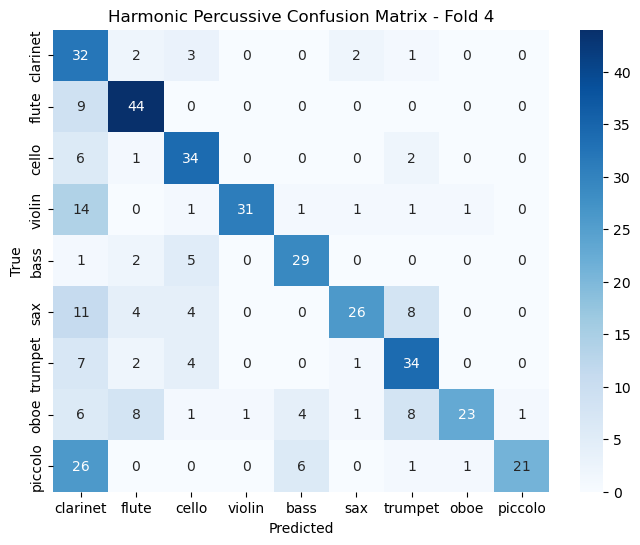

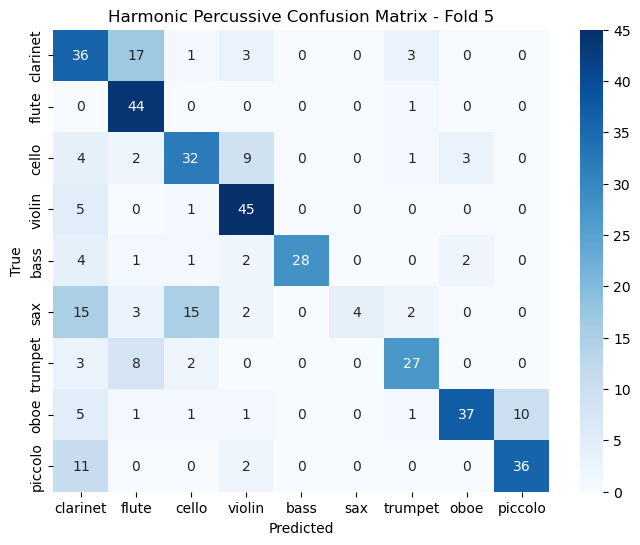


Onset Strength Model
Accuracies: [0.17592592537403107, 0.1736111044883728, 0.16203702986240387, 0.2361111044883728, 0.22969837486743927]
Mean: 0.1955, Std: 0.0310, Min: 0.1620, Max: 0.2361


precision    recall  f1-score     support
clarinet       0.000000  0.000000  0.000000   52.000000
flute          0.000000  0.000000  0.000000   50.000000
cello          0.121019  0.716981  0.207084   53.000000
violin         0.272727  0.063830  0.103448   47.000000
bass           0.476190  0.476190  0.476190   21.000000
sax            0.000000  0.000000  0.000000   43.000000
trumpet        0.750000  0.160714  0.264706   56.000000
oboe           0.228571  0.320000  0.266667   50.000000
piccolo        0.000000  0.000000  0.000000   60.000000
accuracy       0.175926  0.175926  0.175926    0.175926
macro avg      0.205390  0.193080  0.146455  432.000000
weighted avg   0.191344  0.175926  0.124987  432.000000

precision    recall  f1-score     support
clarinet       0.166667  0.081633  0.109589   49.000000
flute          0.230769  0.051724  0.084507   58.000000
cello          0.118182  0.565217  0.195489   46.000000
violin         0.157895  0.130435  0.142857   46.000000
bass           0.590909  0.351351  0.440678   37.000000
sax            0.000000  0.000000  0.000000   55.000000
trumpet        0.193878  0.339286  0.246753   56.000000
oboe           0.363636  0.093023  0.148148   43.000000
piccolo        0.000000  0.000000  0.000000   42.000000
accuracy       0.173611  0.173611  0.173611    0.173611
macro avg      0.202437  0.179185  0.152002  432.000000
weighted avg   0.191222  0.173611  0.144280  432.000000

precision    recall  f1-score     support
clarinet       0.123077  0.163265  0.140351   49.000000
flute          0.200000  0.022727  0.040816   44.000000
cello          0.155844  0.210526  0.179104   57.000000
violin         0.186047  0.142857  0.161616   56.000000
bass           0.333333  0.192308  0.243902   26.000000
sax            0.250000  0.034483  0.060606   58.000000
trumpet        0.152174  0.280000  0.197183   50.000000
oboe           0.157480  0.416667  0.228571   48.000000
piccolo        0.000000  0.000000  0.000000   44.000000
accuracy       0.162037  0.162037  0.162037    0.162037
macro avg      0.173106  0.162537  0.139128  432.000000
weighted avg   0.167747  0.162037  0.135694  432.000000

precision    recall  f1-score     support
clarinet       0.000000  0.000000  0.000000   40.000000
flute          0.131148  0.150943  0.140351   53.000000
cello          0.145038  0.441860  0.218391   43.000000
violin         0.238095  0.200000  0.217391   50.000000
bass           0.812500  0.702703  0.753623   37.000000
sax            0.333333  0.018868  0.035714   53.000000
trumpet        0.192308  0.520833  0.280899   48.000000
oboe           0.458333  0.207547  0.285714   53.000000
piccolo        0.222222  0.036364  0.062500   55.000000
accuracy       0.236111  0.236111  0.236111    0.236111
macro avg      0.281442  0.253235  0.221620  432.000000
weighted avg   0.274458  0.236111  0.207267  432.000000

precision    recall  f1-score     support
clarinet       0.250000  0.033333  0.058824   60.000000
flute          0.180851  0.377778  0.244604   45.000000
cello          0.113208  0.117647  0.115385   51.000000
violin         0.204545  0.352941  0.258993   51.000000
bass           0.583333  0.552632  0.567568   38.000000
sax            0.130435  0.073171  0.093750   41.000000
trumpet        0.217391  0.125000  0.158730   40.000000
oboe           0.283333  0.303571  0.293103   56.000000
piccolo        0.217391  0.204082  0.210526   49.000000
accuracy       0.229698  0.229698  0.229698    0.229698
macro avg      0.242276  0.237795  0.222387  431.000000
weighted avg   0.236828  0.229698  0.213735  431.000000

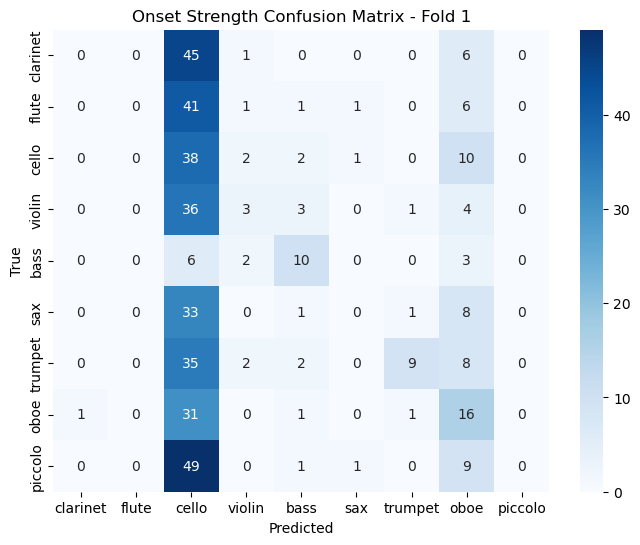

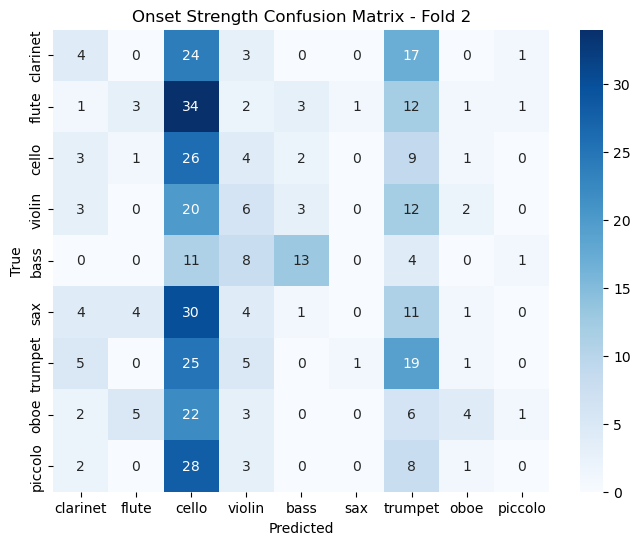

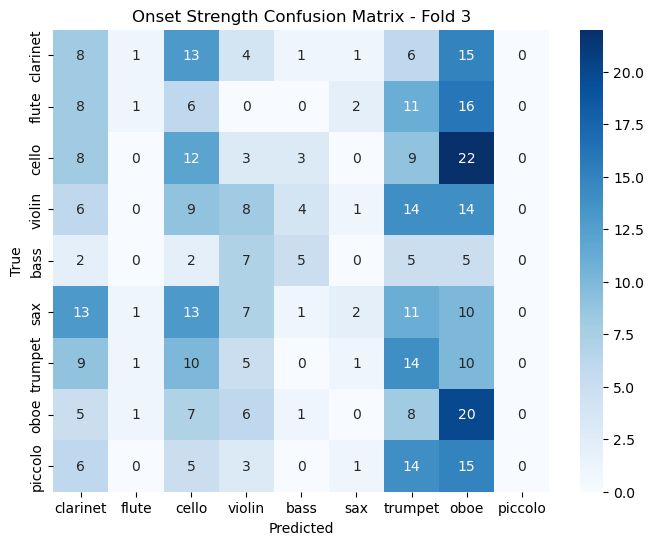

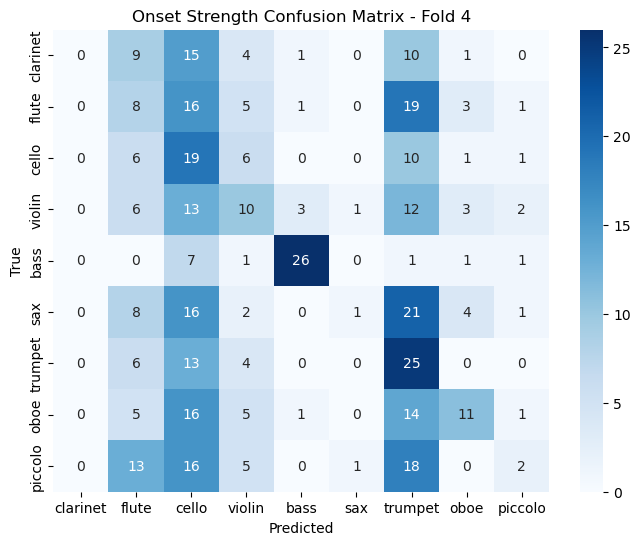

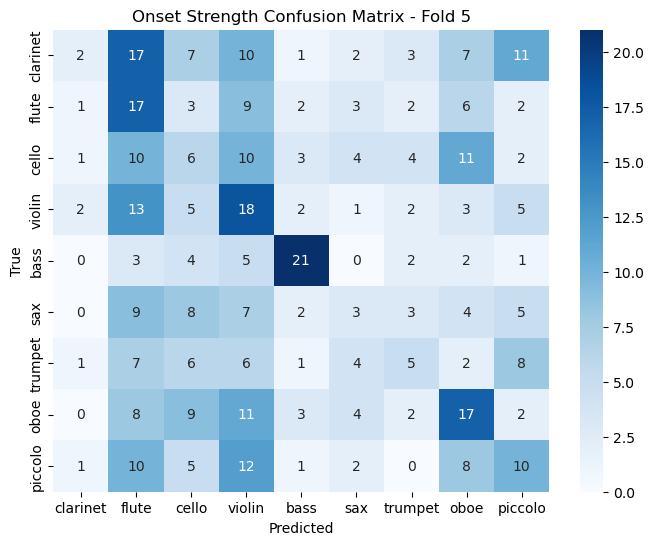

In [9]:
# Show detailed results for each feature type
for feature_type, results in individual_results.items():
    print(f"\n{'='*40}")
    print(f"{feature_type.replace('_', ' ').title()} Model")
    print(f"{'='*40}")
    accs = results['accuracy_list']
    print(f"Accuracies: {accs}")
    print(f"Mean: {np.mean(accs):.4f}, Std: {np.std(accs):.4f}, Min: {np.min(accs):.4f}, Max: {np.max(accs):.4f}")

    # Classification reports
    for i, report in enumerate(results['classification_reports']):
        df = pd.DataFrame(report).transpose()
        df.index = [class_names[int(idx)] if idx.isdigit() and int(idx) < len(class_names) else idx for idx in df.index]
        display(df)

    # Confusion matrices
    for i, conf_matrix in enumerate(results['confusion_matrices']):
        plt.figure(figsize=(8, 6))
        sns.heatmap(np.array(conf_matrix), annot=True, fmt="d", cmap="Blues",
                    xticklabels=class_names, yticklabels=class_names)
        plt.title(f"{feature_type.replace('_', ' ').title()} Confusion Matrix - Fold {i+1}")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.show()

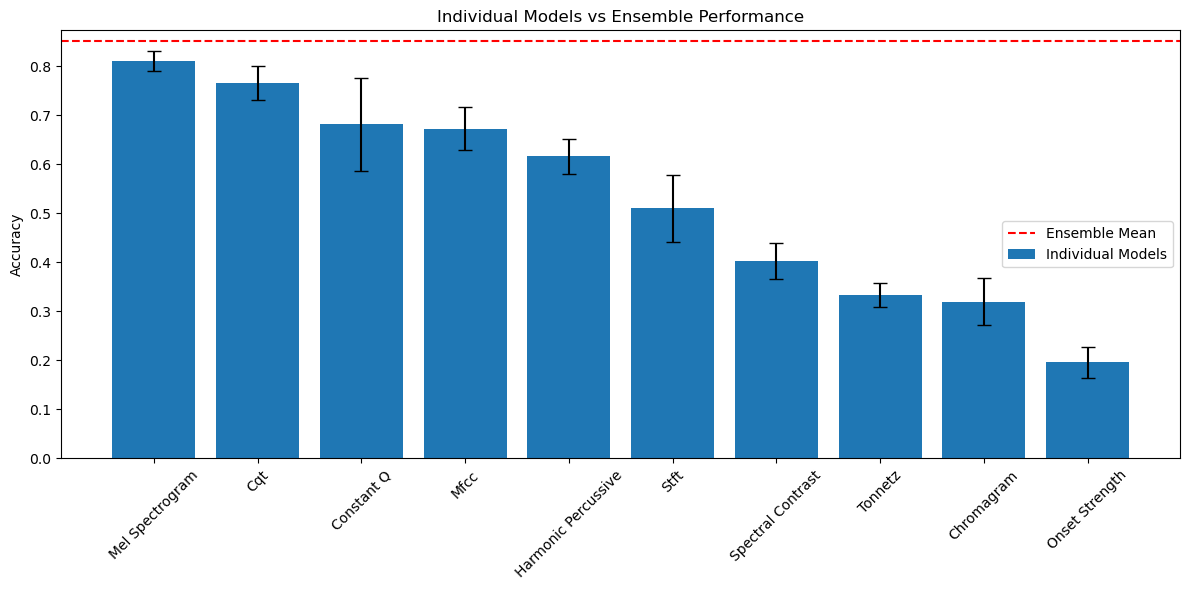

In [10]:
# Visual comparison of individual vs ensemble performance
plt.figure(figsize=(12, 6))
plt.bar(performance_df['Feature Type'], performance_df['Mean Accuracy'], yerr=performance_df['Std Accuracy'], capsize=5, label='Individual Models')
plt.axhline(np.mean(ensemble_results['accuracy_list']), color='red', linestyle='--', label='Ensemble Mean')
plt.ylabel('Accuracy')
plt.title('Individual Models vs Ensemble Performance')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Mel Spectrogram Training History


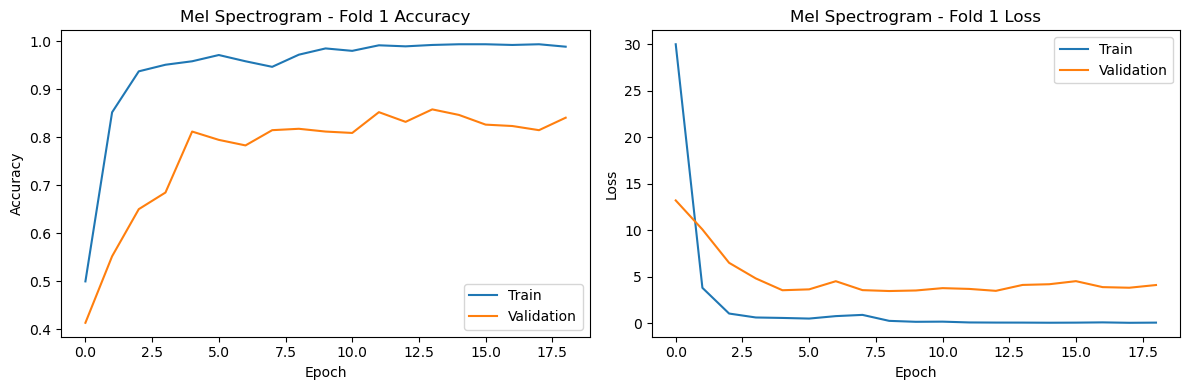

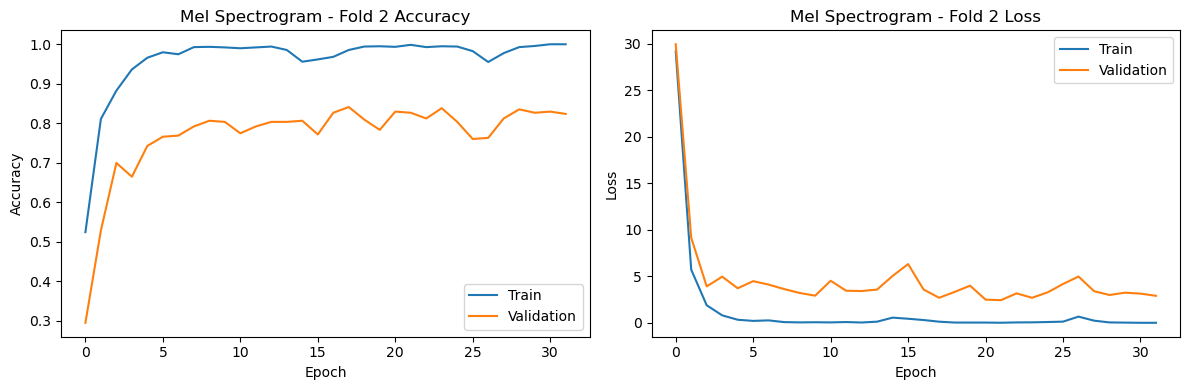

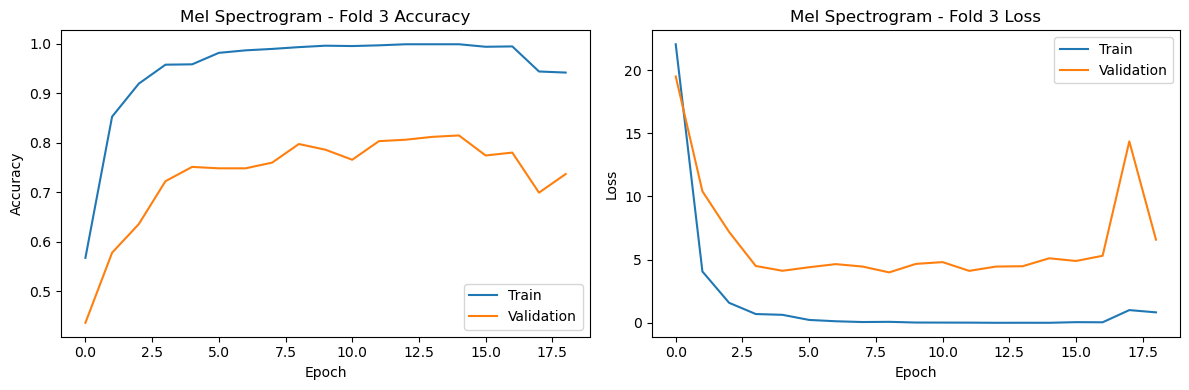

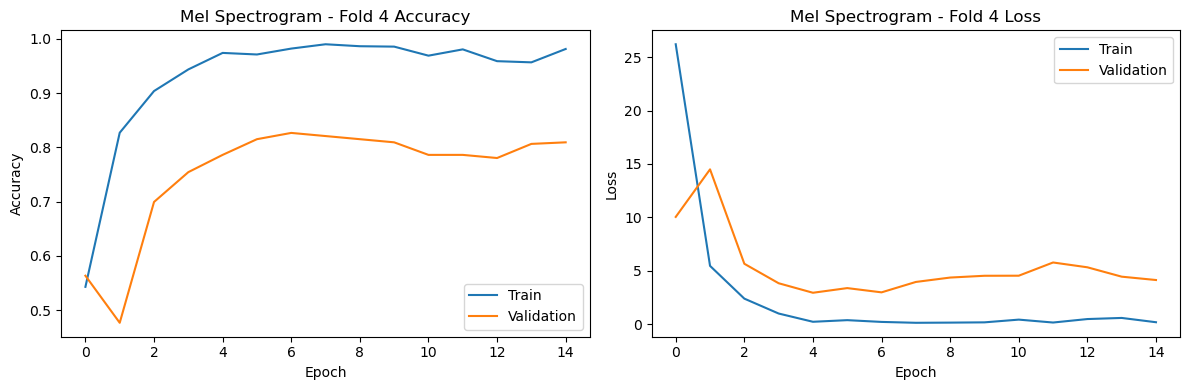

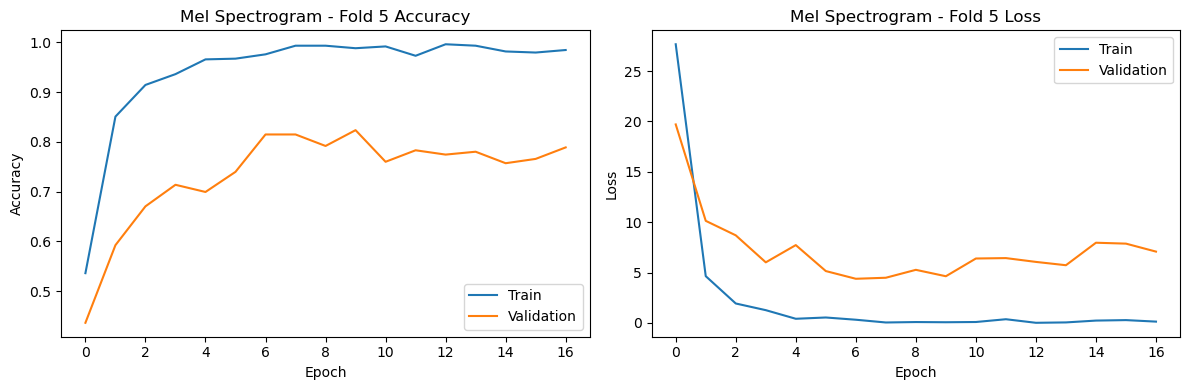


Mfcc Training History


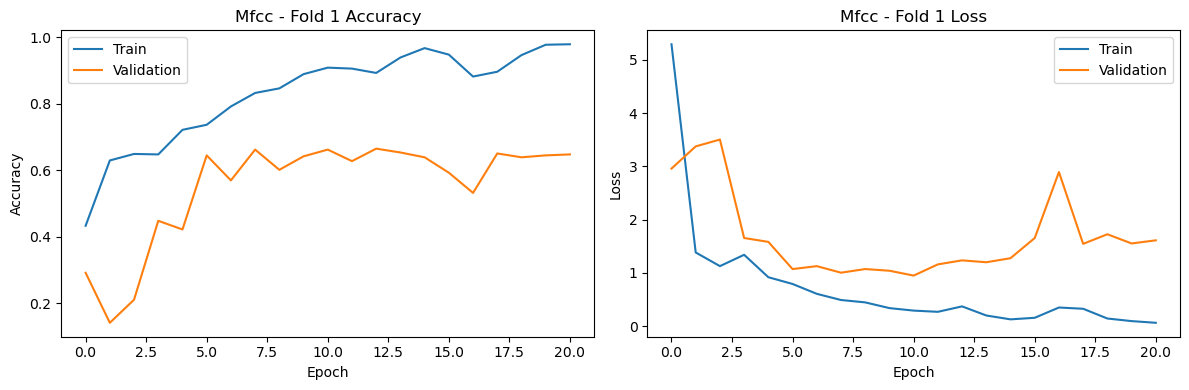

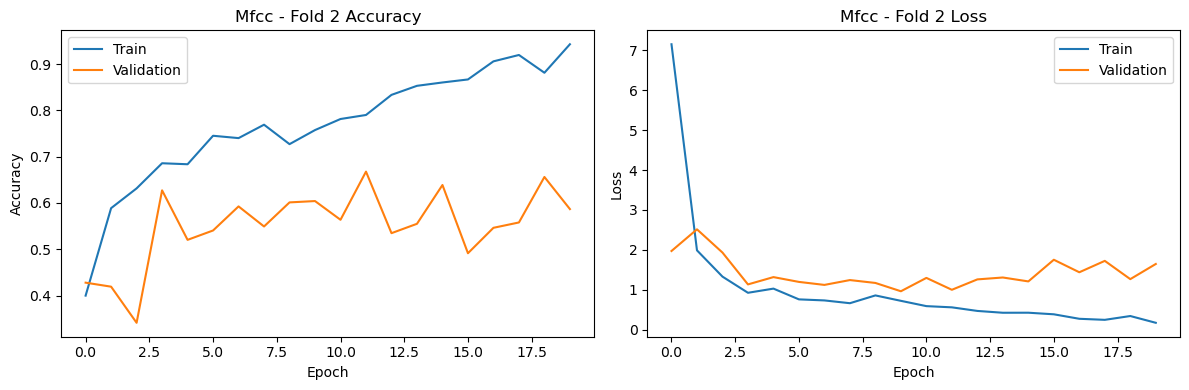

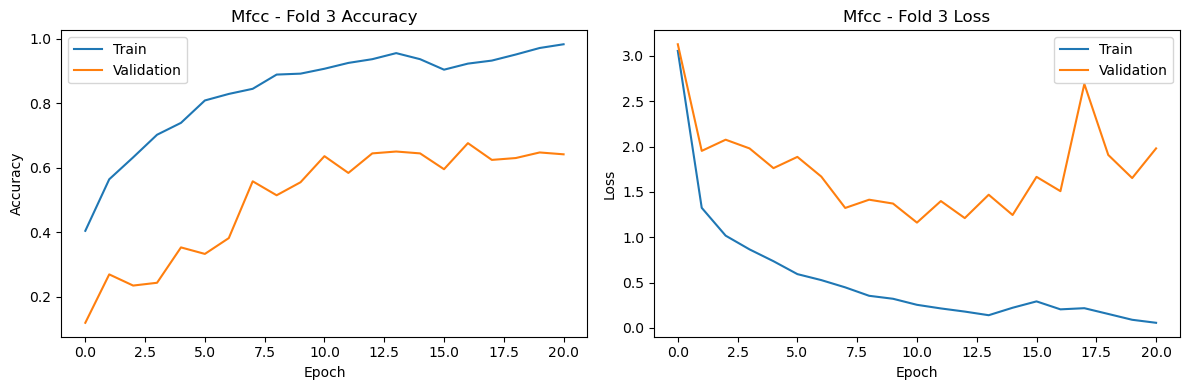

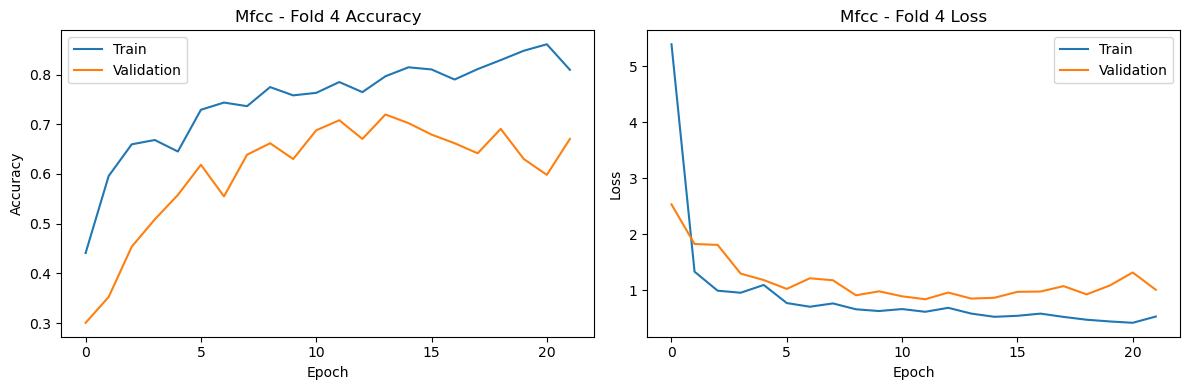

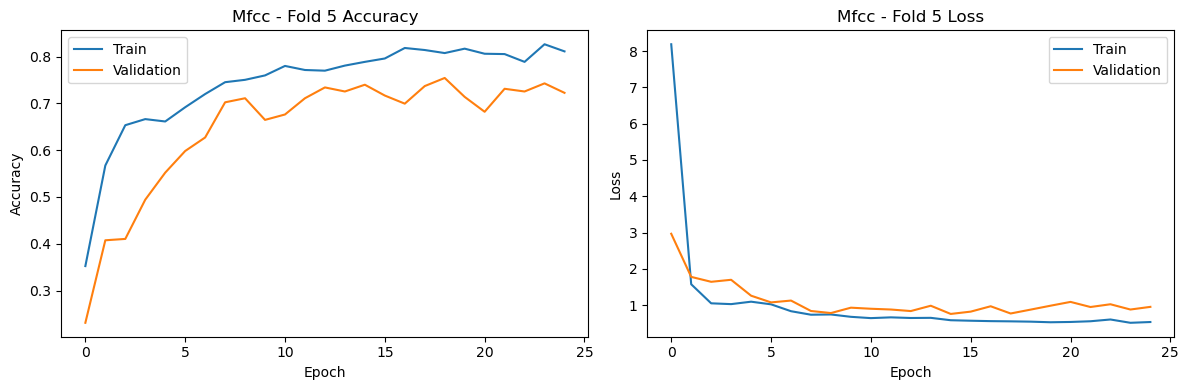


Chromagram Training History


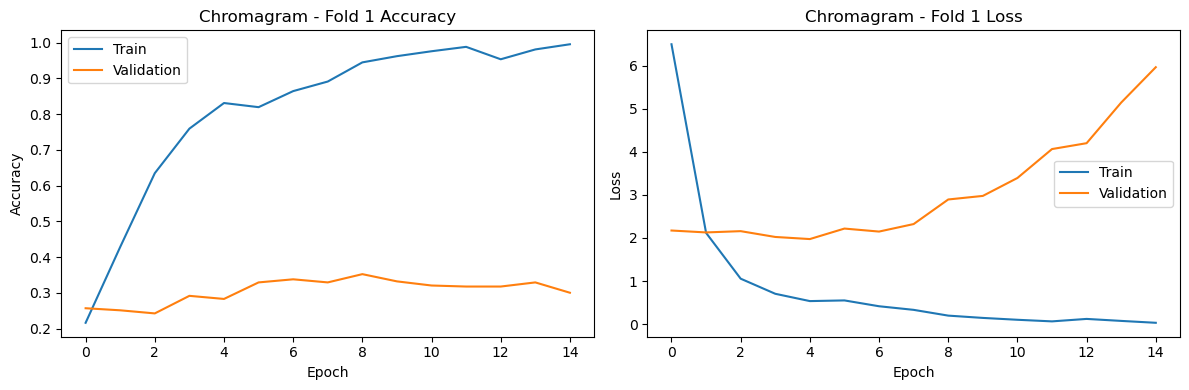

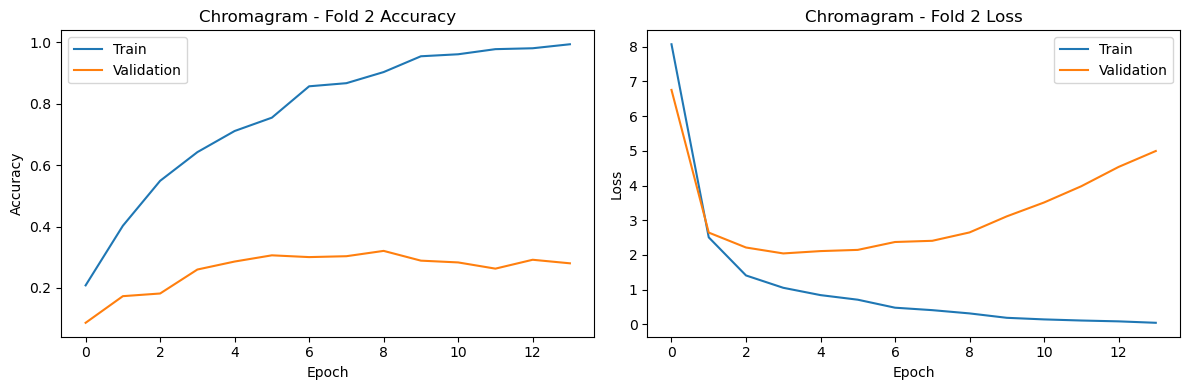

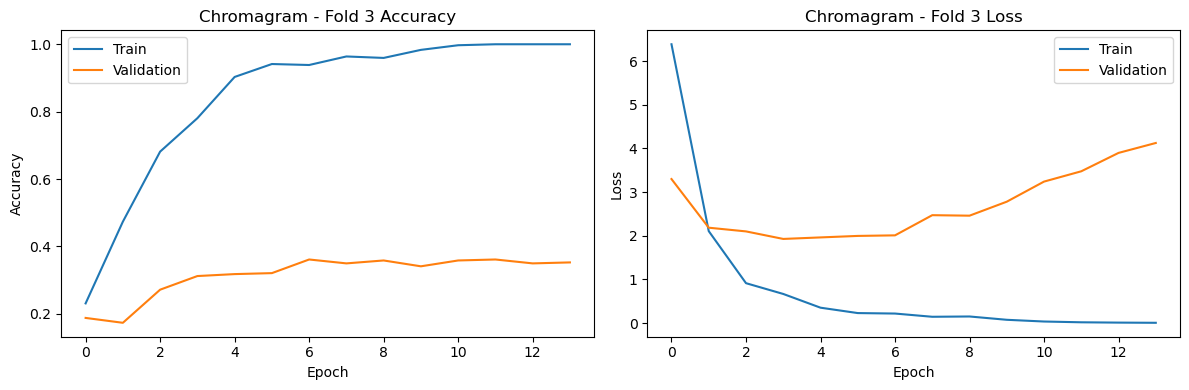

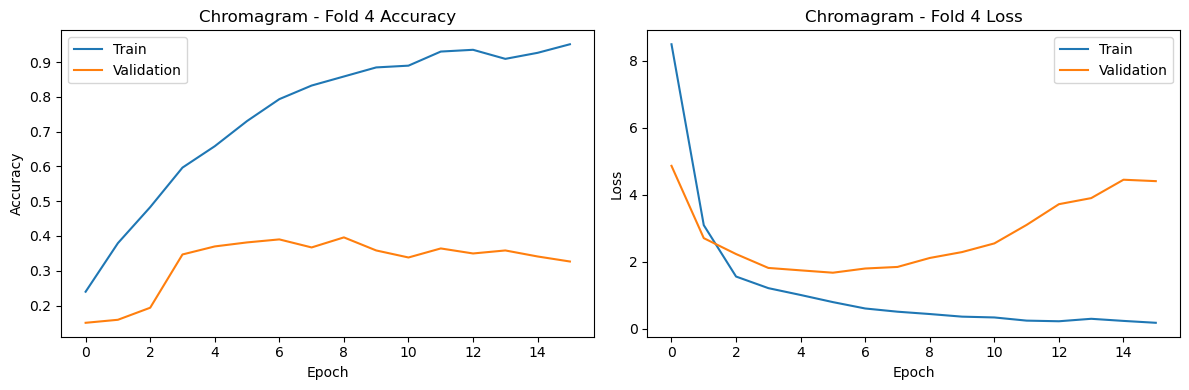

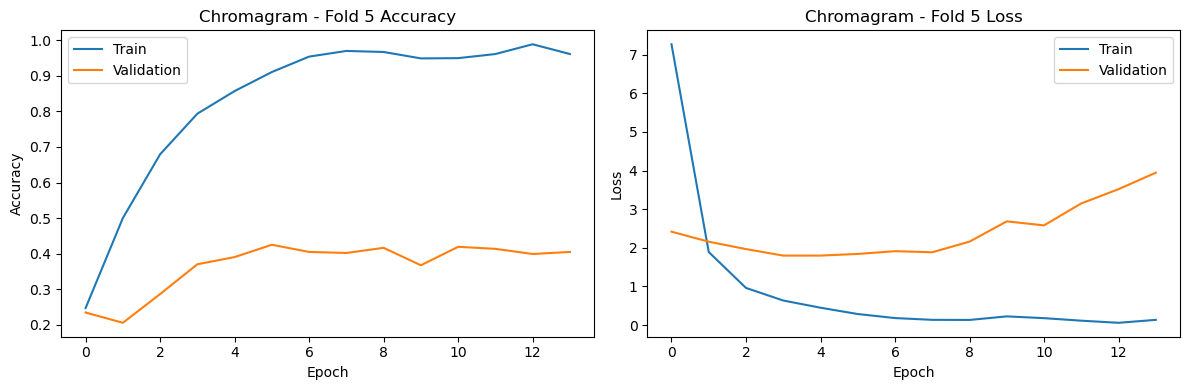


Spectral Contrast Training History


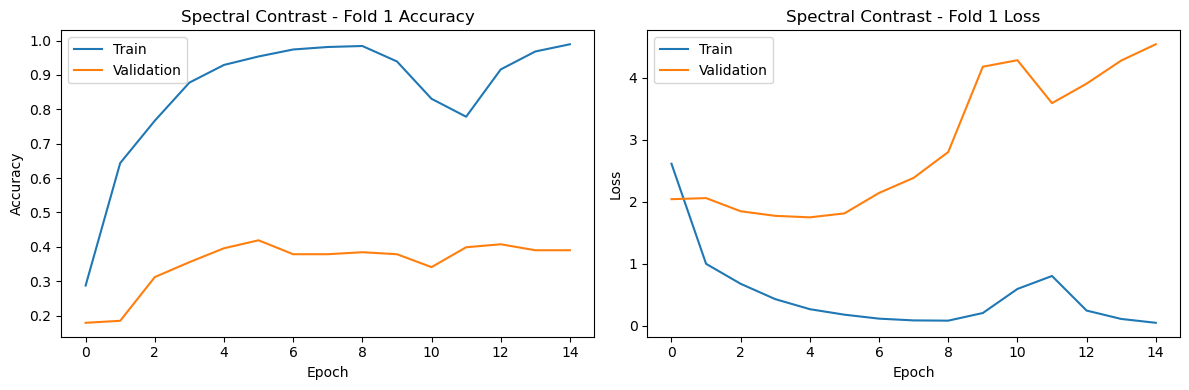

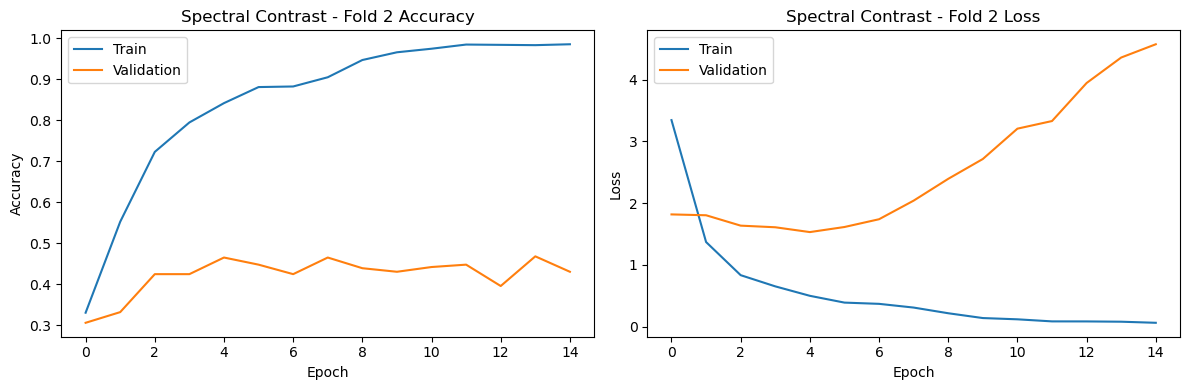

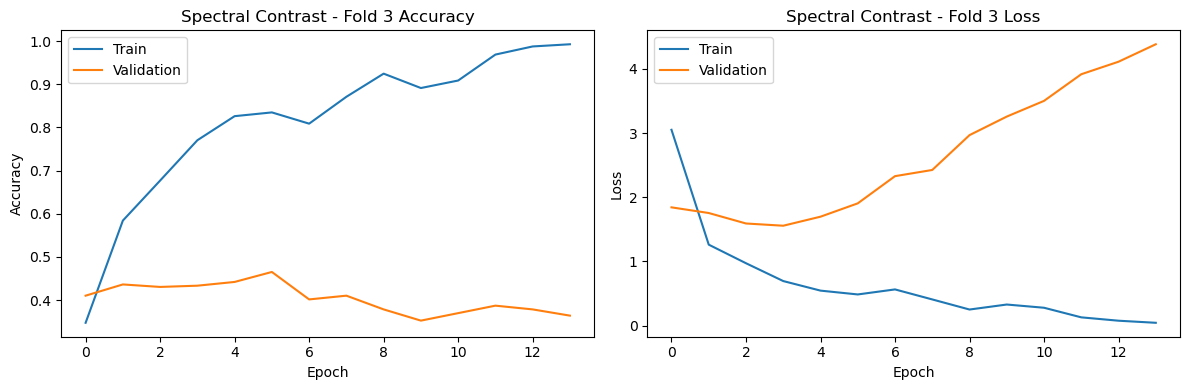

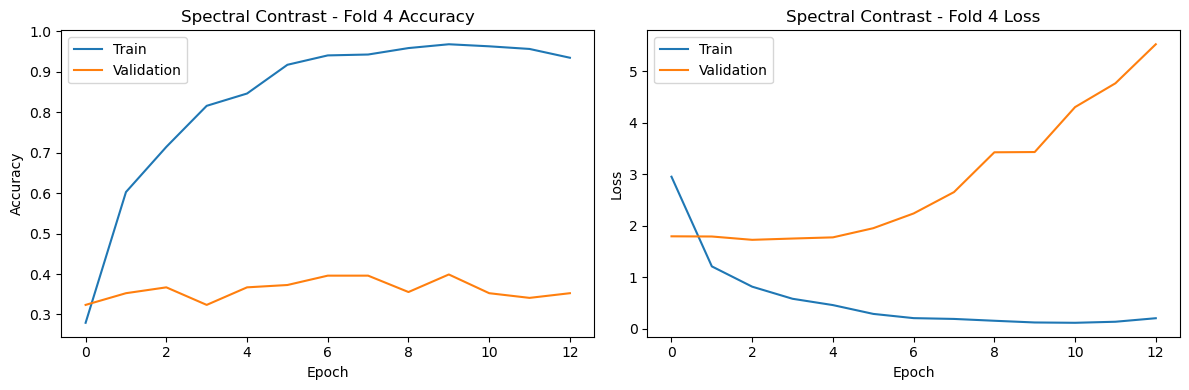

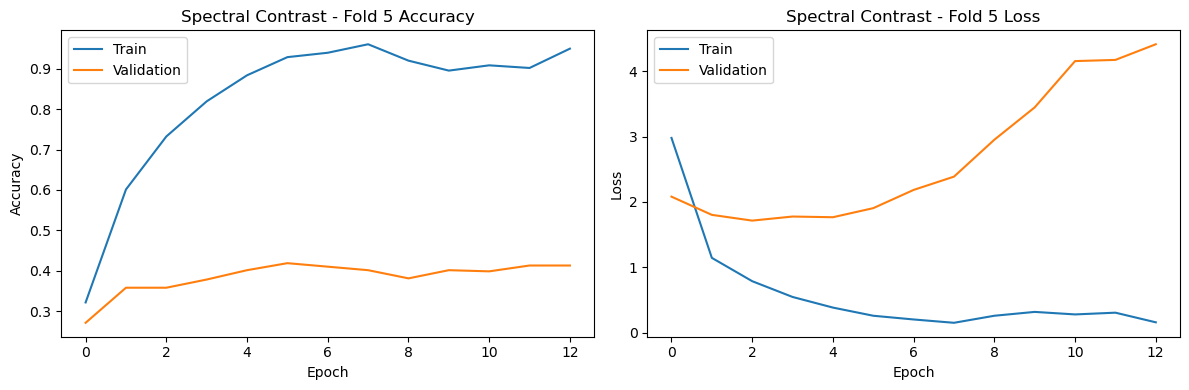


Tonnetz Training History


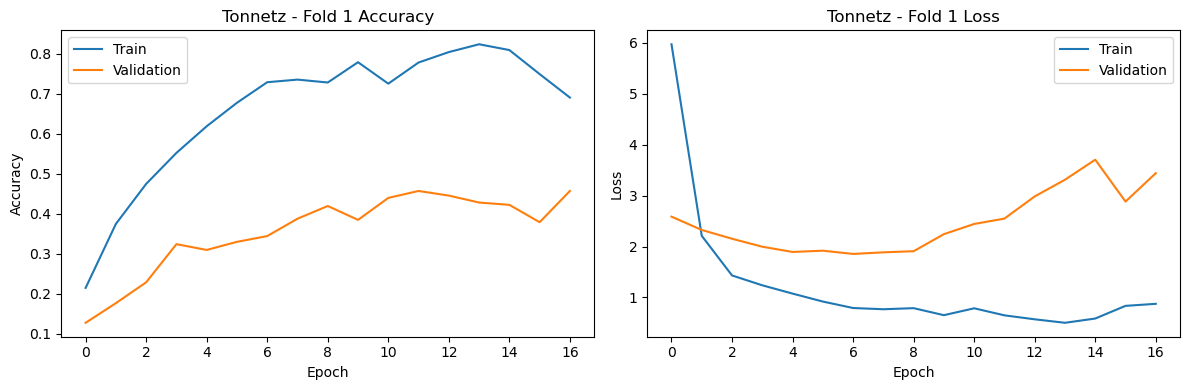

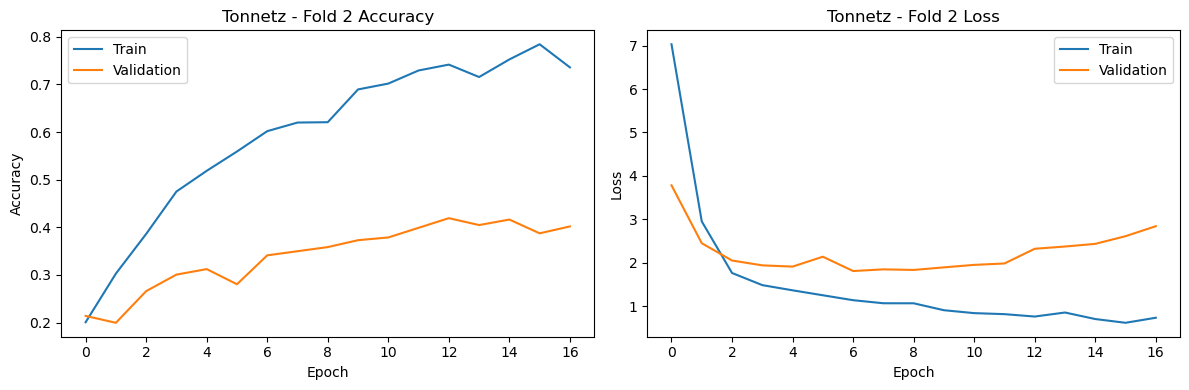

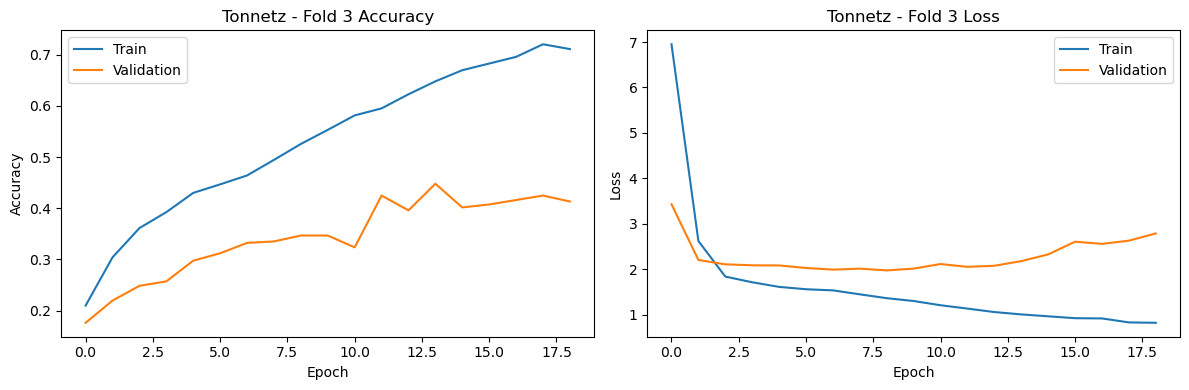

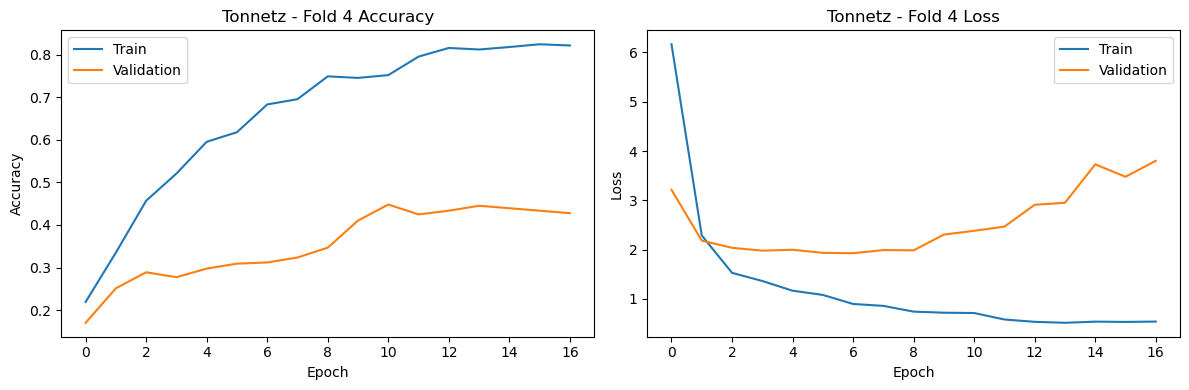

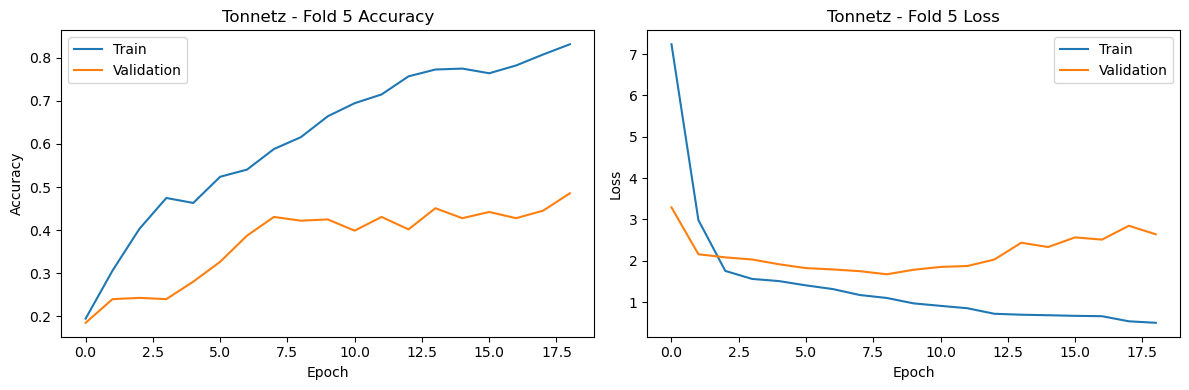


Constant Q Training History


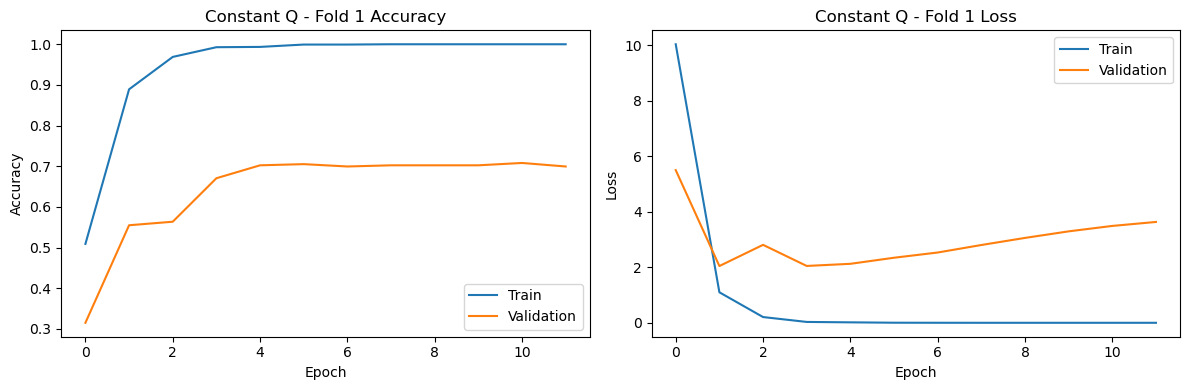

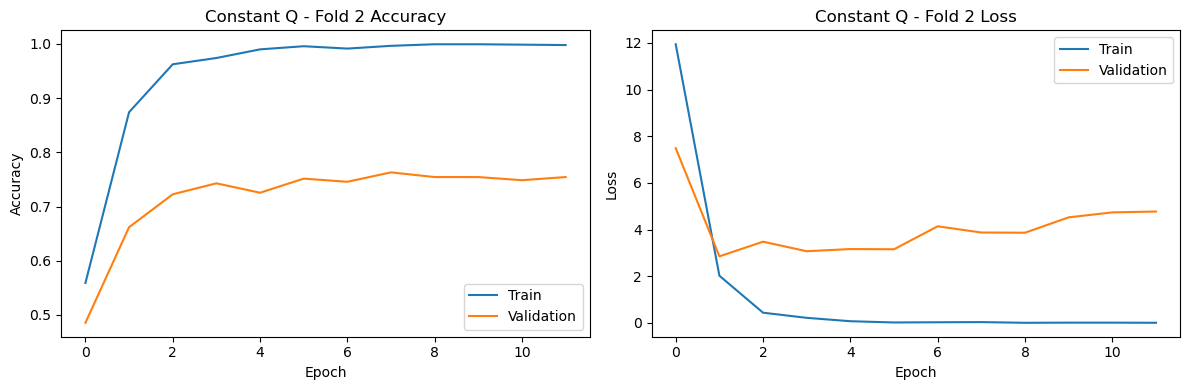

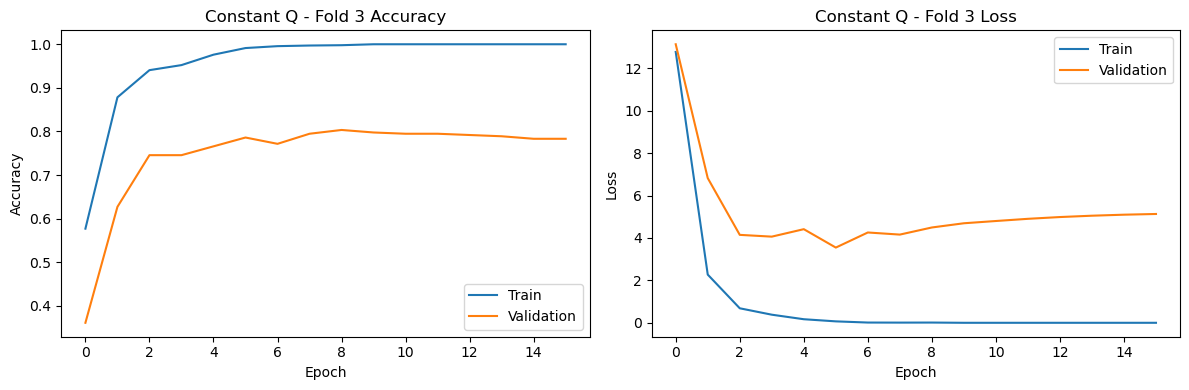

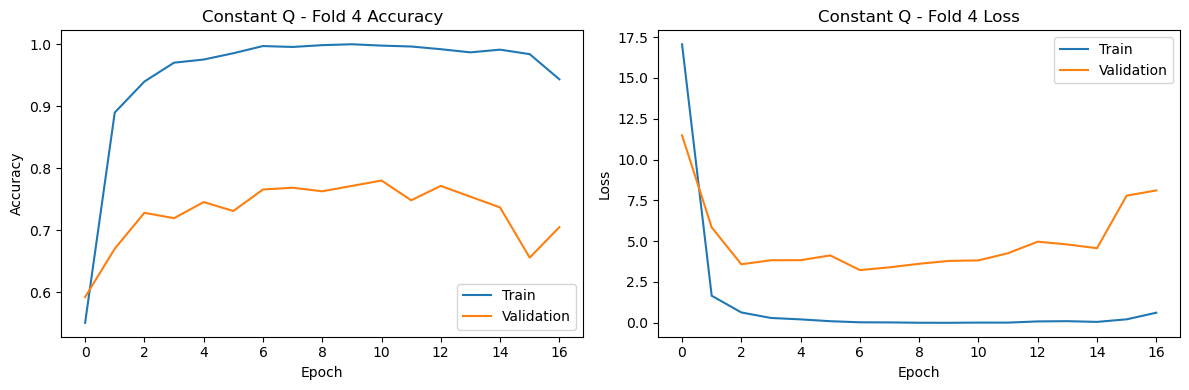

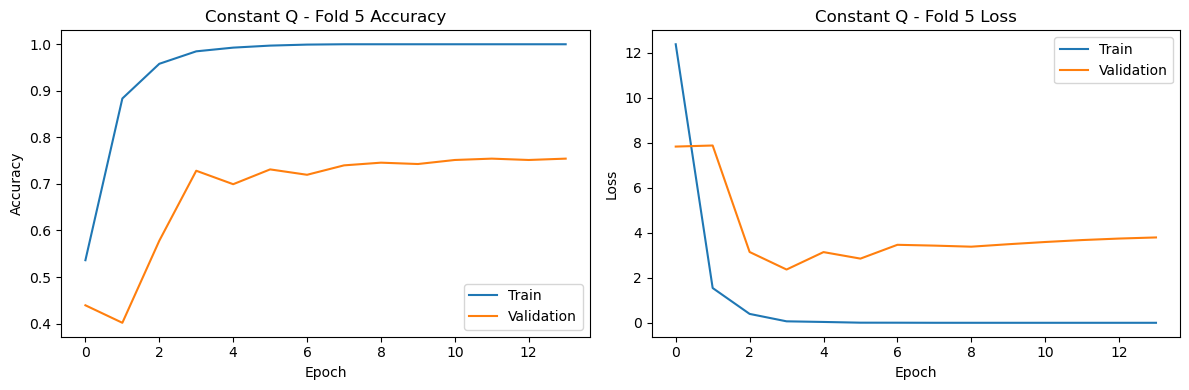


Cqt Training History


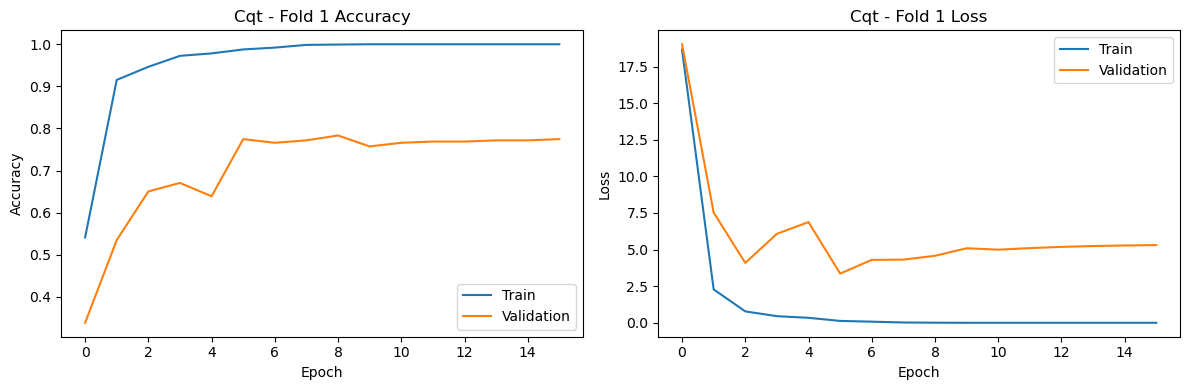

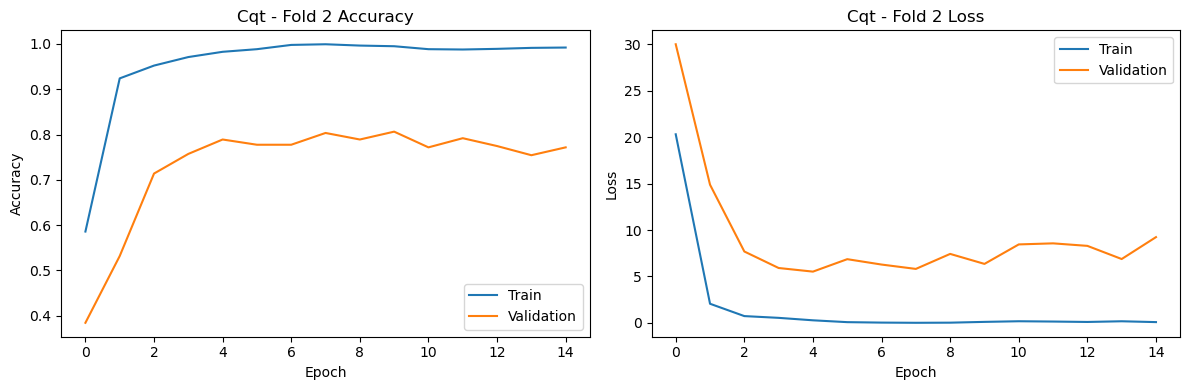

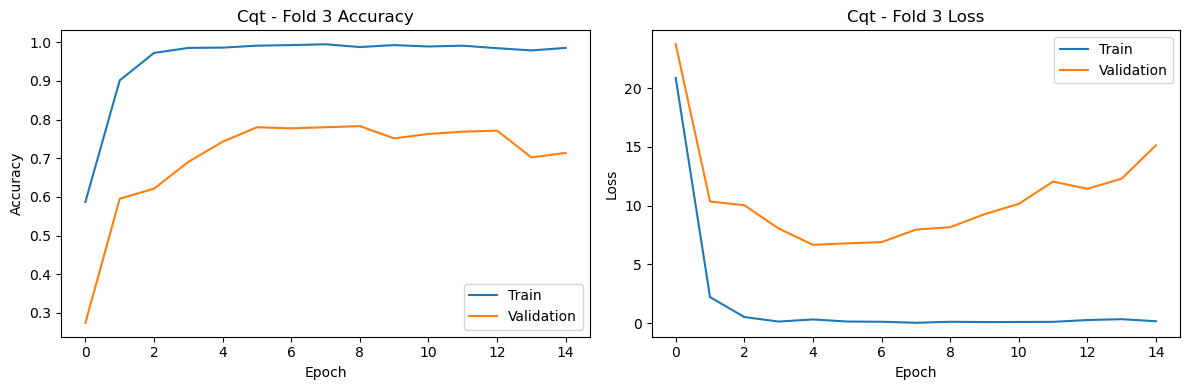

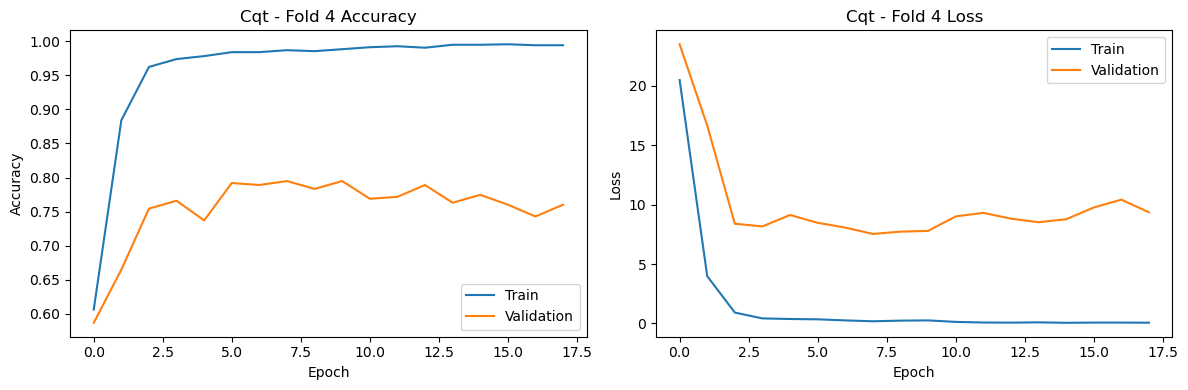

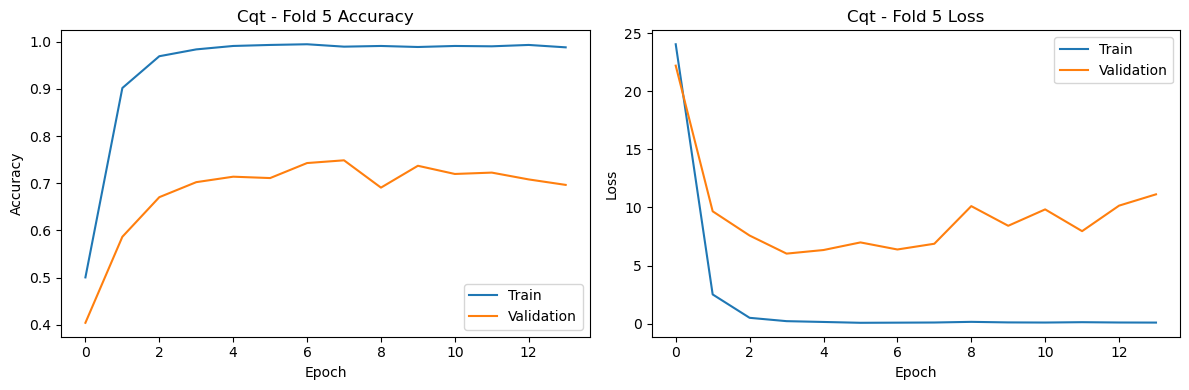


Stft Training History


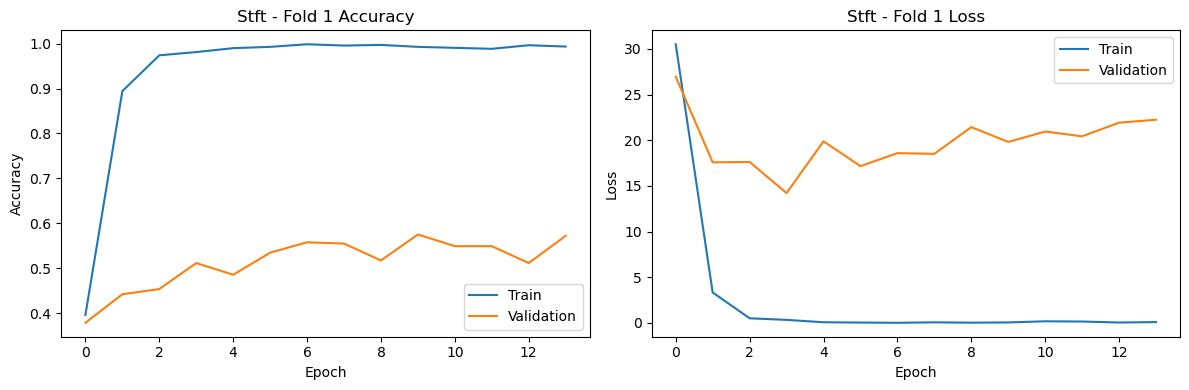

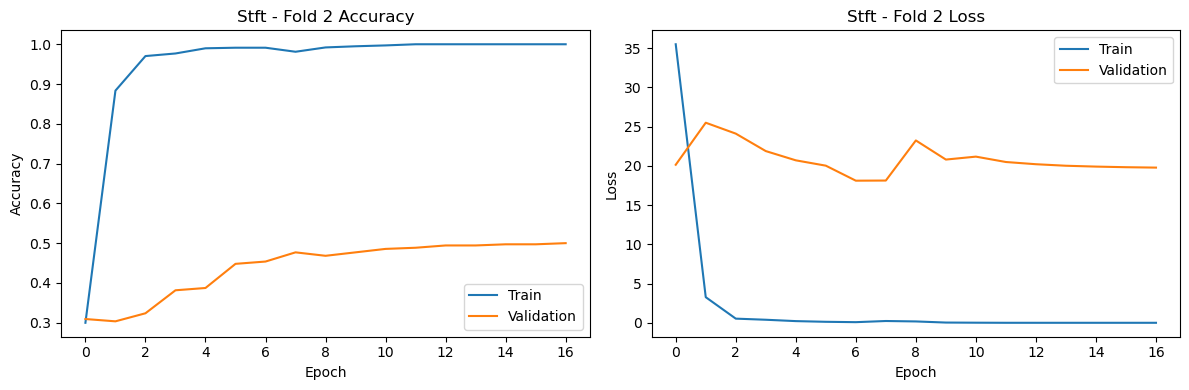

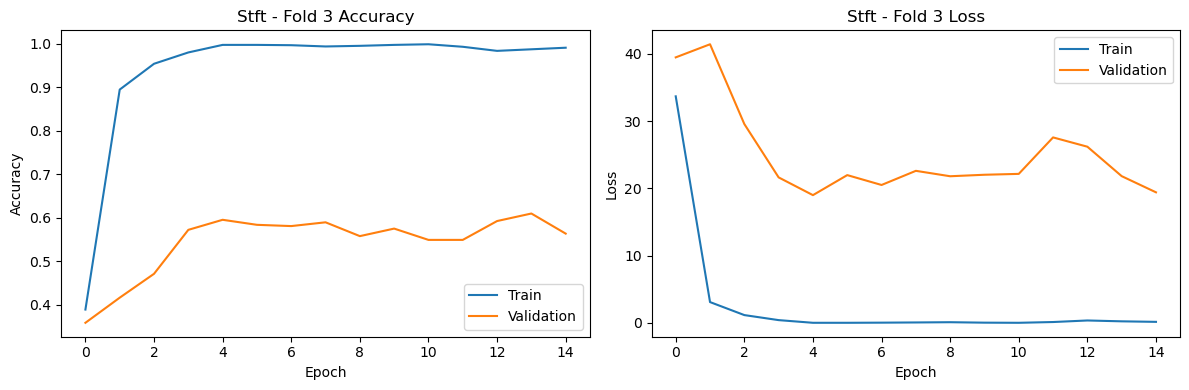

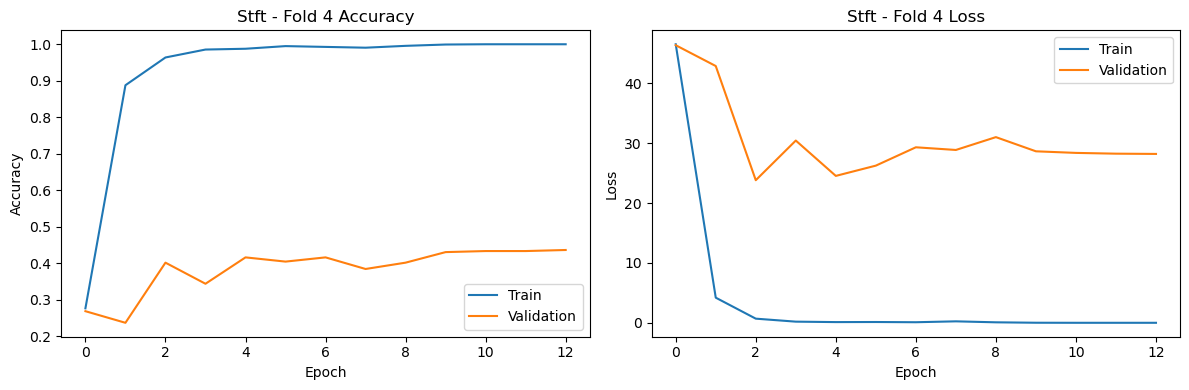

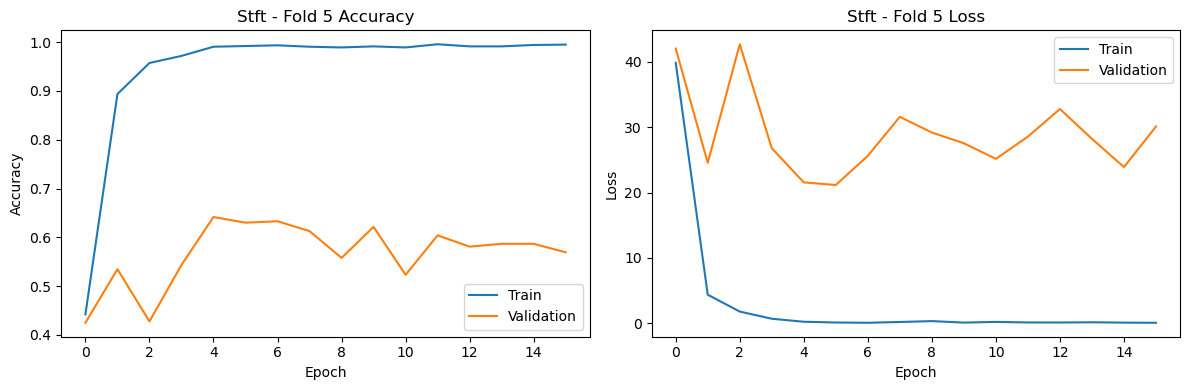


Harmonic Percussive Training History


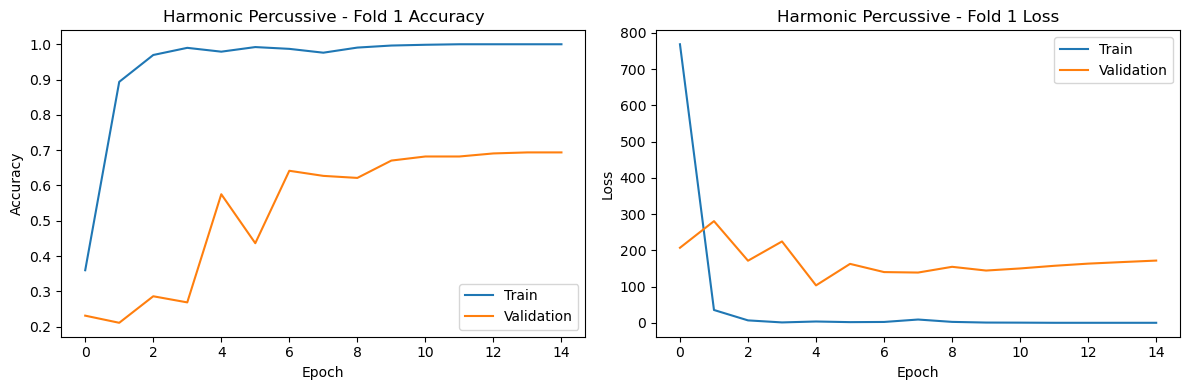

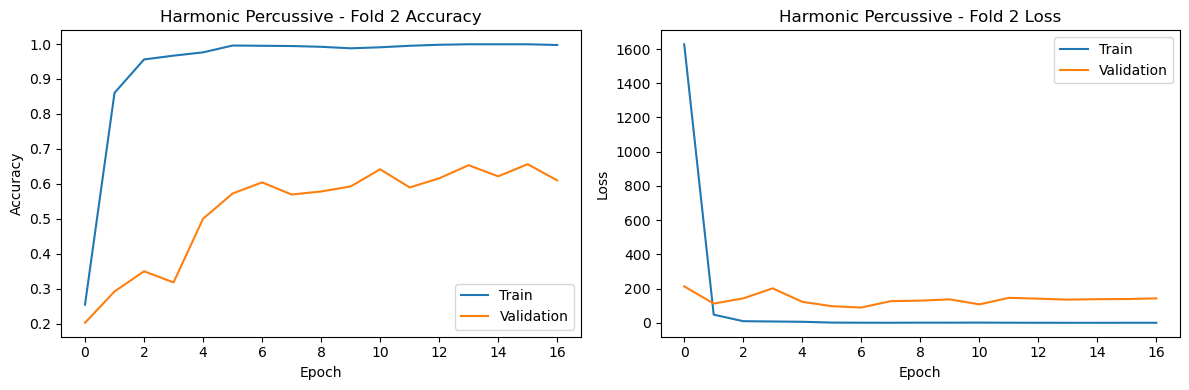

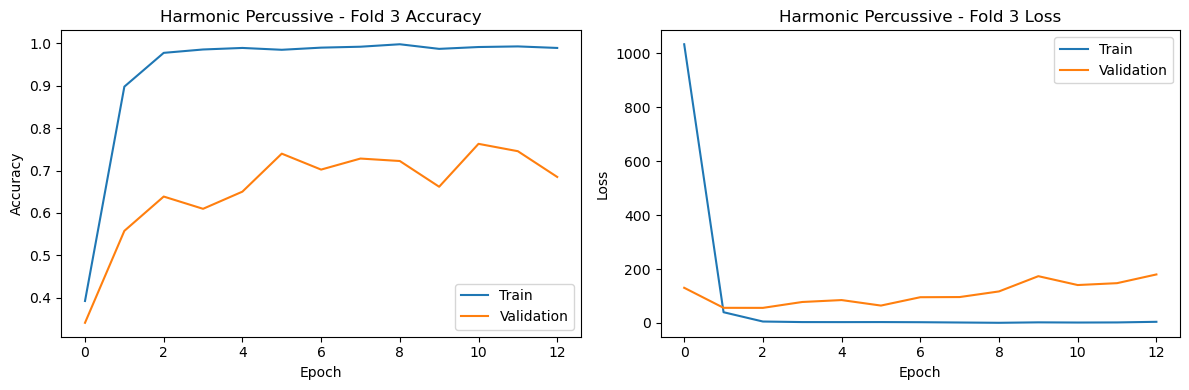

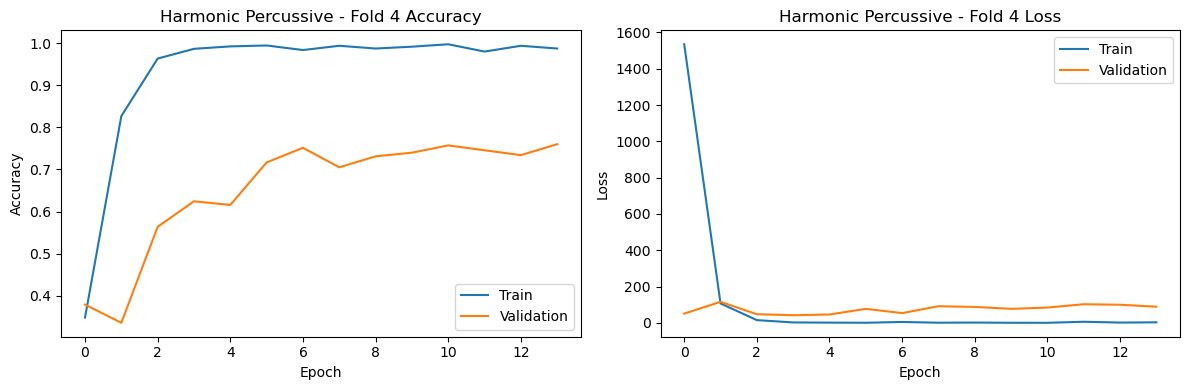

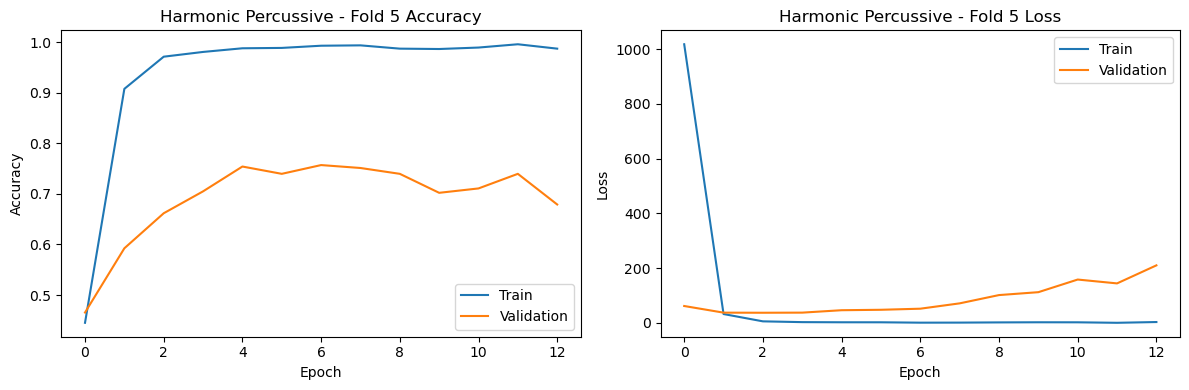


Onset Strength Training History


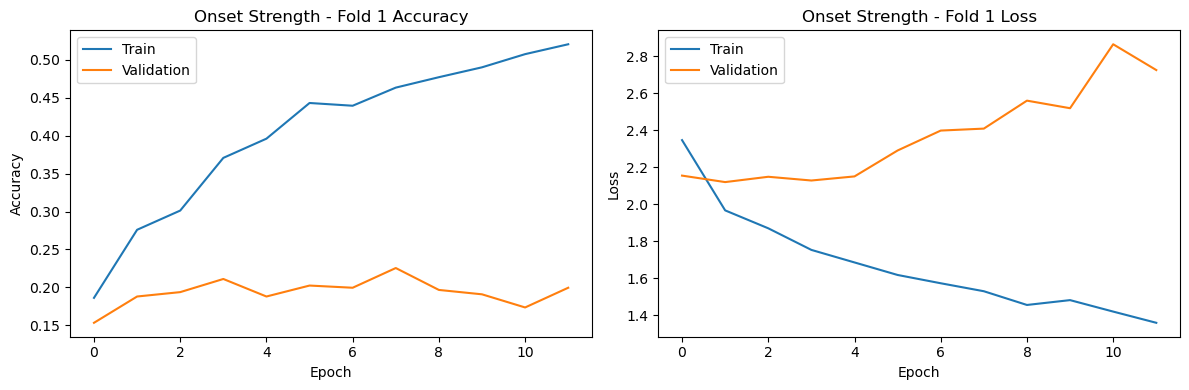

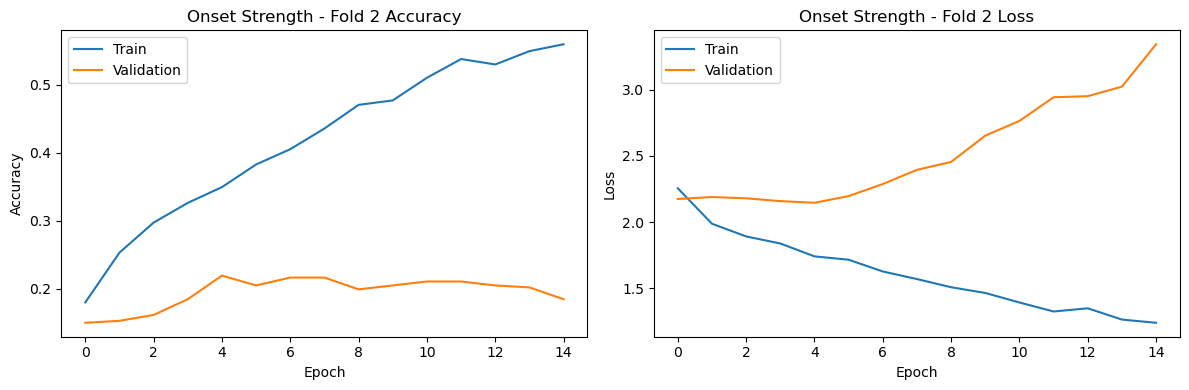

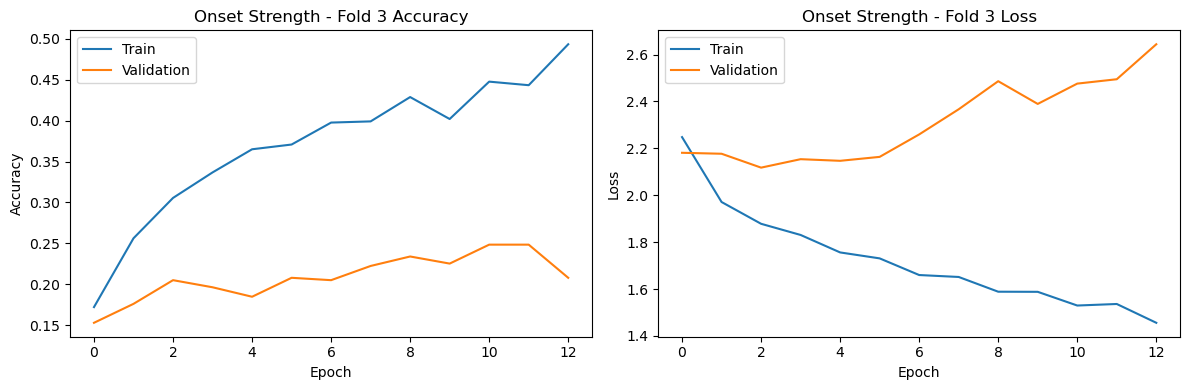

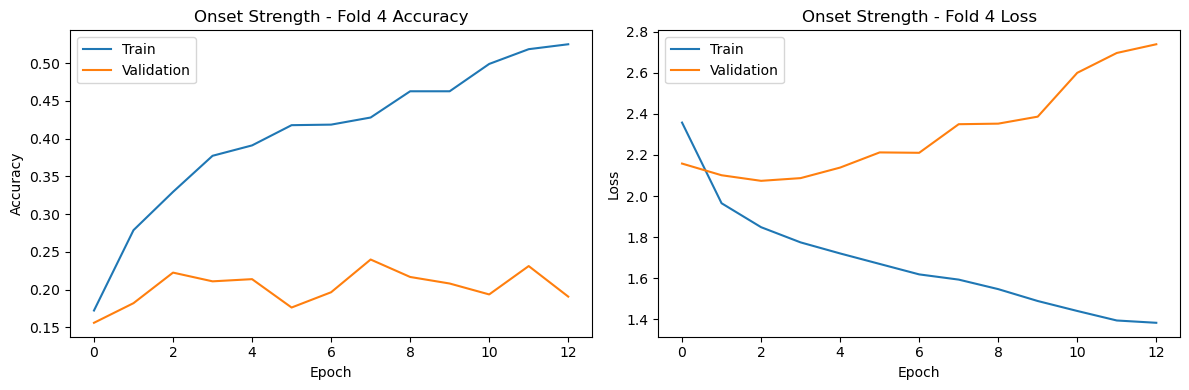

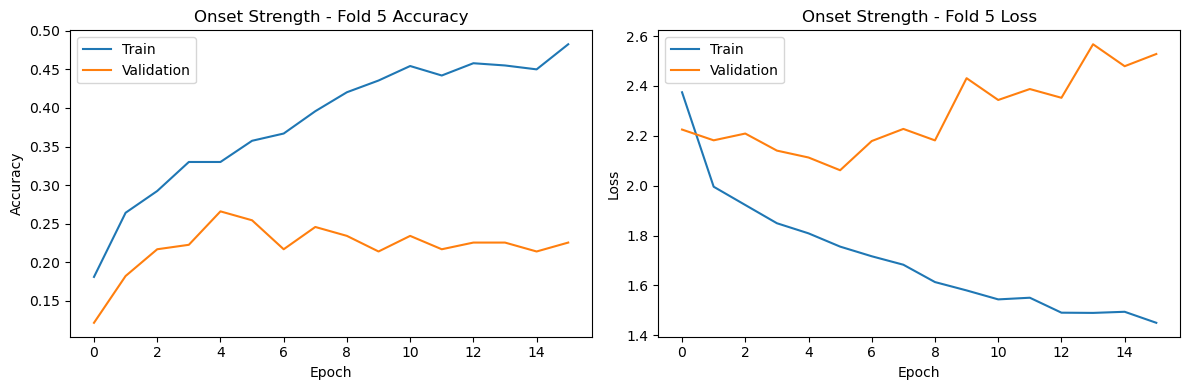

In [11]:
# Plot training/validation accuracy and loss for each model and fold
for feature_type, results in individual_results.items():
    histories = results.get('histories', [])
    if not histories:
        continue
    print(f"\n{'='*40}\n{feature_type.replace('_', ' ').title()} Training History\n{'='*40}")
    for fold, history in enumerate(histories):
        plt.figure(figsize=(12, 4))
        # Accuracy
        plt.subplot(1, 2, 1)
        plt.plot(history.get("accuracy", []), label="Train")
        plt.plot(history.get("val_accuracy", []), label="Validation")
        plt.title(f"{feature_type.replace('_', ' ').title()} - Fold {fold+1} Accuracy")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.legend()
        # Loss
        plt.subplot(1, 2, 2)
        plt.plot(history.get("loss", []), label="Train")
        plt.plot(history.get("val_loss", []), label="Validation")
        plt.title(f"{feature_type.replace('_', ' ').title()} - Fold {fold+1} Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        plt.tight_layout()
        plt.show()

In [12]:
# Get best individual model by mean accuracy
best_model = performance_df.iloc[0]['Feature Type'].replace(' ', '_').lower()
ensemble_acc = np.array(ensemble_results['accuracy_list'])
individual_acc = np.array(individual_results[best_model]['accuracy_list'])

t_stat, p_val = ttest_rel(ensemble_acc, individual_acc)
print(f"Paired t-test p-value (ensemble vs best individual): {p_val:.4e}")
if p_val < 0.05:
    print("Difference is statistically significant (p < 0.05)")
else:
    print("Difference is NOT statistically significant (p >= 0.05)")

Paired t-test p-value (ensemble vs best individual): 1.8921e-02
Difference is statistically significant (p < 0.05)


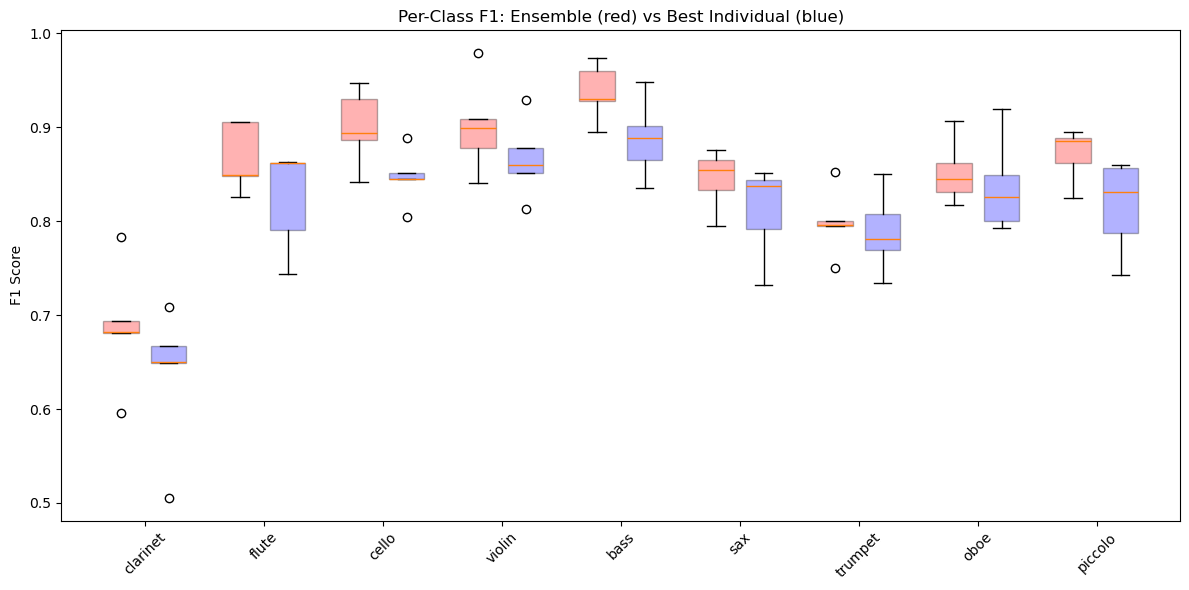

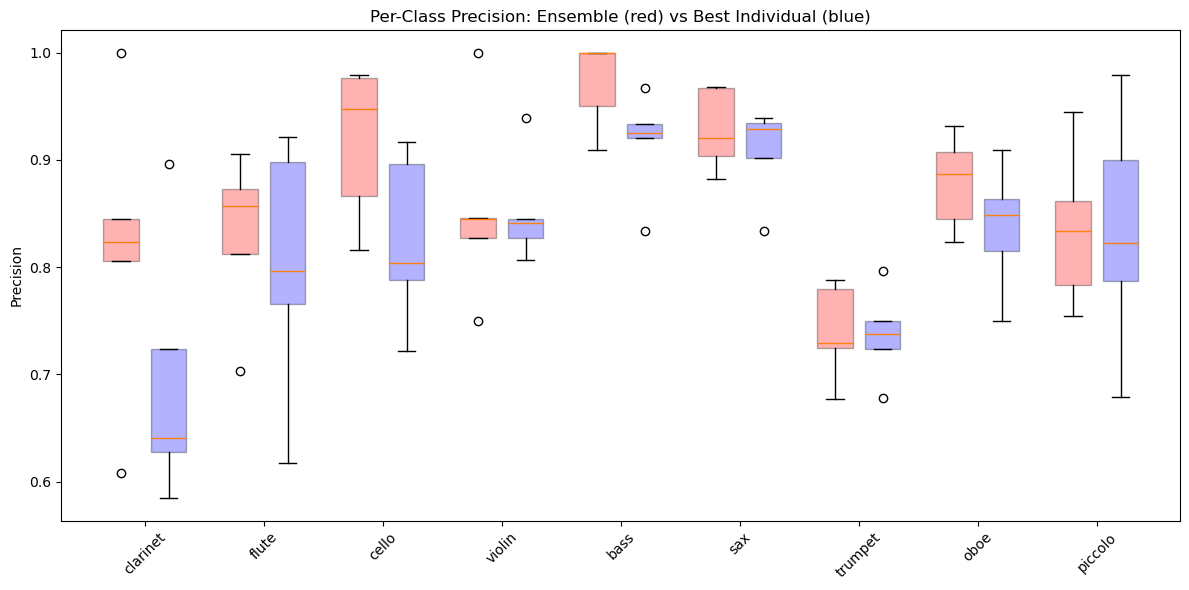

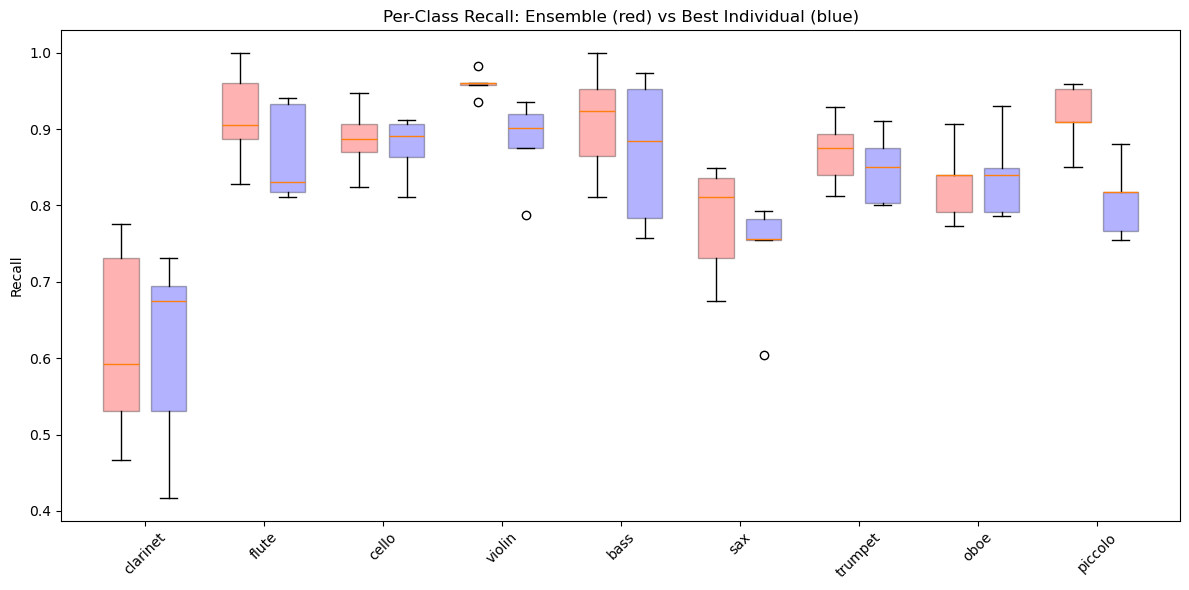

In [13]:
# Compare per-class F1, Precision, Recall between ensemble and best individual model
best_model = performance_df.iloc[0]['Feature Type'].replace(' ', '_').lower()
ensemble_f1, individual_f1 = [], []
ensemble_prec, individual_prec = [], []
ensemble_rec, individual_rec = [], []

class_labels = [str(i) for i in range(len(class_names))]

for fold in range(len(ensemble_results['classification_reports'])):
    e_report = ensemble_results['classification_reports'][fold]
    i_report = individual_results[best_model]['classification_reports'][fold]
    ensemble_f1.append([e_report[c]['f1-score'] for c in class_labels])
    individual_f1.append([i_report[c]['f1-score'] for c in class_labels])
    ensemble_prec.append([e_report[c]['precision'] for c in class_labels])
    individual_prec.append([i_report[c]['precision'] for c in class_labels])
    ensemble_rec.append([e_report[c]['recall'] for c in class_labels])
    individual_rec.append([i_report[c]['recall'] for c in class_labels])

ensemble_f1 = np.array(ensemble_f1)
individual_f1 = np.array(individual_f1)
ensemble_prec = np.array(ensemble_prec)
individual_prec = np.array(individual_prec)
ensemble_rec = np.array(ensemble_rec)
individual_rec = np.array(individual_rec)

plt.figure(figsize=(12, 6))
plt.boxplot([ensemble_f1[:,i] for i in range(len(class_names))], positions=np.arange(len(class_names))-0.2, widths=0.3, patch_artist=True, boxprops=dict(facecolor='red', alpha=0.3), labels=class_names)
plt.boxplot([individual_f1[:,i] for i in range(len(class_names))], positions=np.arange(len(class_names))+0.2, widths=0.3, patch_artist=True, boxprops=dict(facecolor='blue', alpha=0.3))
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.ylabel('F1 Score')
plt.title('Per-Class F1: Ensemble (red) vs Best Individual (blue)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.boxplot([ensemble_prec[:,i] for i in range(len(class_names))], positions=np.arange(len(class_names))-0.2, widths=0.3, patch_artist=True, boxprops=dict(facecolor='red', alpha=0.3), labels=class_names)
plt.boxplot([individual_prec[:,i] for i in range(len(class_names))], positions=np.arange(len(class_names))+0.2, widths=0.3, patch_artist=True, boxprops=dict(facecolor='blue', alpha=0.3))
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.ylabel('Precision')
plt.title('Per-Class Precision: Ensemble (red) vs Best Individual (blue)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.boxplot([ensemble_rec[:,i] for i in range(len(class_names))], positions=np.arange(len(class_names))-0.2, widths=0.3, patch_artist=True, boxprops=dict(facecolor='red', alpha=0.3), labels=class_names)
plt.boxplot([individual_rec[:,i] for i in range(len(class_names))], positions=np.arange(len(class_names))+0.2, widths=0.3, patch_artist=True, boxprops=dict(facecolor='blue', alpha=0.3))
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.ylabel('Recall')
plt.title('Per-Class Recall: Ensemble (red) vs Best Individual (blue)')
plt.tight_layout()
plt.show()

In [14]:
# Show top-3 most confused class pairs for ensemble and best individual (by sum of off-diagonal confusion)
def top_confusions(conf_matrices, class_names, top_n=3):
    total_conf = np.sum(np.array(conf_matrices), axis=0)
    np.fill_diagonal(total_conf, 0)
    flat = total_conf.flatten()
    top_idx = flat.argsort()[-top_n:][::-1]
    for idx in top_idx:
        i, j = divmod(idx, total_conf.shape[1])
        print(f"True: {class_names[i]}, Pred: {class_names[j]}, Count: {total_conf[i, j]}")

print("Top 3 most confused class pairs (Ensemble):")
top_confusions(ensemble_results['confusion_matrices'], class_names)

best_model = performance_df.iloc[0]['Feature Type'].replace(' ', '_').lower()
print("\nTop 3 most confused class pairs (Best Individual):")
top_confusions(individual_results[best_model]['confusion_matrices'], class_names)

Top 3 most confused class pairs (Ensemble):
True: clarinet, Pred: piccolo, Count: 20
True: oboe, Pred: trumpet, Count: 20
True: sax, Pred: flute, Count: 19

Top 3 most confused class pairs (Best Individual):
True: sax, Pred: flute, Count: 24
True: oboe, Pred: trumpet, Count: 22
True: clarinet, Pred: oboe, Count: 22


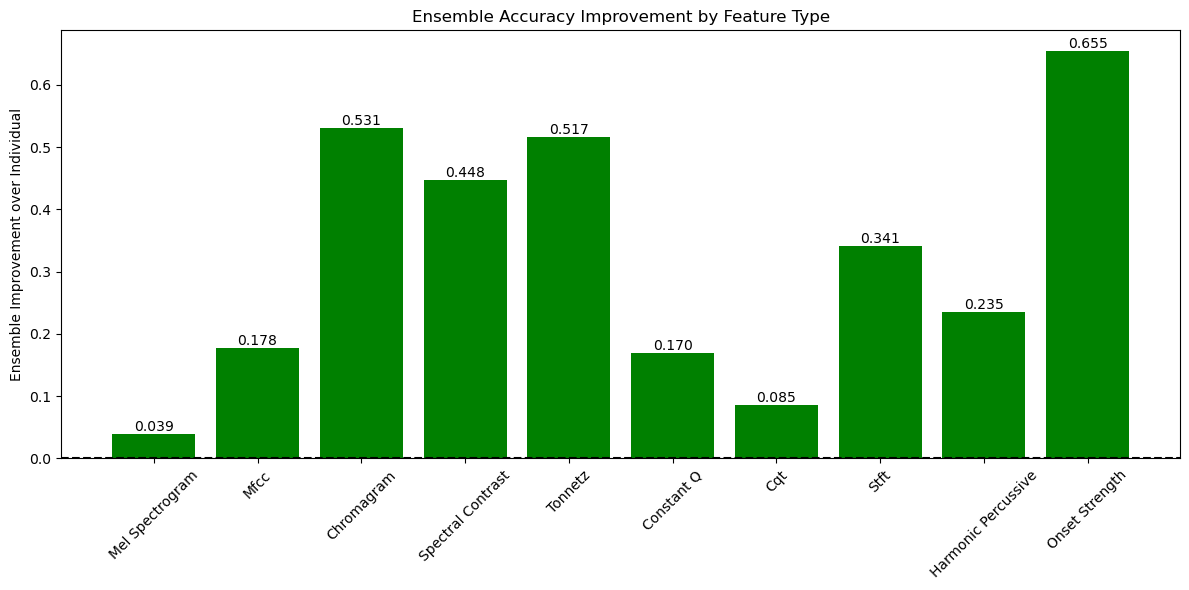

In [15]:
# Bar plot of (ensemble accuracy - individual accuracy) per feature type
improvements = []
for ft in FEATURE_TYPES:
    if ft in individual_results:
        individual_mean = np.mean(individual_results[ft]['accuracy_list'])
        improvement = np.mean(ensemble_results['accuracy_list']) - individual_mean
        improvements.append(improvement)
    else:
        improvements.append(np.nan)

plt.figure(figsize=(12, 6))
bars = plt.bar([ft.replace('_', ' ').title() for ft in FEATURE_TYPES], improvements, color=['green' if imp > 0 else 'red' for imp in improvements])
plt.axhline(0, color='black', linestyle='--')
plt.ylabel('Ensemble Improvement over Individual')
plt.title('Ensemble Accuracy Improvement by Feature Type')
plt.xticks(rotation=45)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{improvements[i]:.3f}", ha='center', va='bottom' if improvements[i] > 0 else 'top')
plt.tight_layout()
plt.show()

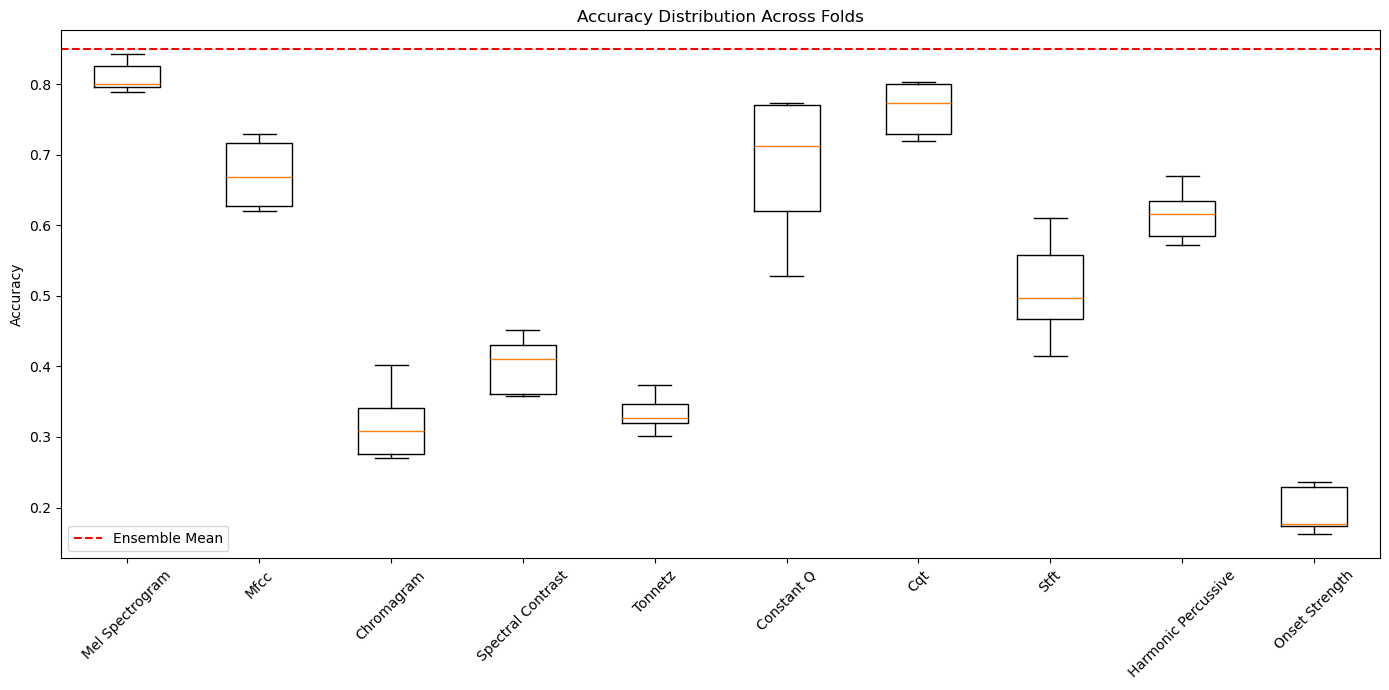

In [16]:
# Boxplot of accuracy distributions across folds for each model and the ensemble
data_for_box = [individual_results[ft]['accuracy_list'] for ft in FEATURE_TYPES if ft in individual_results]
labels = [ft.replace('_', ' ').title() for ft in FEATURE_TYPES if ft in individual_results]

plt.figure(figsize=(14, 7))
plt.boxplot(data_for_box, labels=labels)
plt.axhline(np.mean(ensemble_results['accuracy_list']), color='red', linestyle='--', label='Ensemble Mean')
plt.ylabel('Accuracy')
plt.title('Accuracy Distribution Across Folds')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
# Show the worst and best performing fold for each model and the ensemble
print("Worst and Best Fold Accuracies:")
for ft in FEATURE_TYPES:
    if ft in individual_results:
        accs = individual_results[ft]['accuracy_list']
        print(f"{ft.replace('_', ' ').title()}: Min={np.min(accs):.4f}, Max={np.max(accs):.4f}")
ensemble_accs = ensemble_results['accuracy_list']
print(f"Ensemble: Min={np.min(ensemble_accs):.4f}, Max={np.max(ensemble_accs):.4f}")

Worst and Best Fold Accuracies:
Mel Spectrogram: Min=0.7889, Max=0.8426
Mfcc: Min=0.6204, Max=0.7292
Chromagram: Min=0.2708, Max=0.4028
Spectral Contrast: Min=0.3588, Max=0.4514
Tonnetz: Min=0.3009, Max=0.3735
Constant Q: Min=0.5278, Max=0.7731
Cqt: Min=0.7193, Max=0.8032
Stft: Min=0.4144, Max=0.6102
Harmonic Percussive: Min=0.5718, Max=0.6705
Onset Strength: Min=0.1620, Max=0.2361
Ensemble: Min=0.8376, Max=0.8634
